<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

##### **Notebook Structure**

<ol style="list-style-type: upper-roman;font-weight: bold;">
  <li><span style="font-weight: normal;"><a href="#3">Modeling & Evaluation</a></span></li>
  <ol style="list-style-type:lower-alpha;">
    <li><span style="font-weight: normal;"><a href="#definition-of-the-problem">Definition of the Problem</a></span></li>
  </ol>
  <br>

  <ol style="list-style-type:alpha;">
    <li><span style="font-weight: normal;"><a href="#logistic-regression">Logistic Regression</a></span></li>
    <li><span style="font-weight: normal;"><a href="#naive-bayes">Naive Bayes</a></span></li>
    <ol style="list-style-type:lower-roman;">
      <li><span style="font-weight: normal;"><a href="#naive-bayes-categorical">Naive Bayes - Categorical</a></span></li>
      <li><span style="font-weight: normal;"><a href="#naive-bayes-gaussian">Naive Bayes - Gaussian</a></span></li>
    </ol>
    <li><span style="font-weight: normal;"><a href="#knn">K-Nearest Neighbors</a></span></li>
    <ol style="list-style-type:lower-roman;">
      <li><span style="font-weight: normal;"><a href="#knn-brute-force">KNN - Brute Force</a></span></li>
      <li><span style="font-weight: normal;"><a href="#knn-kd-tree">KNN - KD Tree</a></span></li>
      <li><span style="font-weight: normal;"><a href="#knn-ball-tree">KNN - Ball Tree</a></span></li>
      <li><span style="font-weight: normal;"><a href="#knn-locally-weighted-learning">KNN - Locally Weighted Learning (LWL)</a></span></li>
    </ol>
    <li><span style="font-weight: normal;"><a href="#neural-network">Neural Network</a></span></li>
    <li><span style="font-weight: normal;"><a href="#svm">Support Vector Machine</a></span></li>
    <li><span style="font-weight: normal;"><a href="#decision-tree">Decision Tree</a></span></li>
    <li><span style="font-weight: normal;"><a href="#random-forest">Random Forest</a></span></li>
    <li><span style="font-weight: normal;"><a href="#gradient-boosting">Gradient Boosting</a></span></li>
  </ol> <br>
  <ol style="list-style-type:decimal;">
    <li><span style="font-weight: normal;"><a href="#3_1">Model Selection</a></span></li>
    <li><span style="font-weight: normal;"><a href="#3_2">Model Evaluation</a></span></li>
    <li><span style="font-weight: normal;"><a href="#3_3">Model Optimization</a></span></li>
  </ol>
  <li><span style="font-weight: normal;"><a href="#📊-feature-importance">Feature Importance</a></span></li>
  <li><span style="font-weight: normal;"><a href="#🔮-test-data-prediction">Test Data Prediction</a></span></li>
  <li><span style="font-weight: normal;"><a href="#📋-csv-export---submission">CSV Export - Submission [Kaggle]</a></span></li>
</ol>

<br>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## 📚 Libraries Import


In [1]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier


# For evaluation
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold, learning_curve

# Disable warnings [DataConversionWarning & ConvergenceWarning]
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

In [2]:
# Auxiliary function to display multiple dataframes side by side
# Source: https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, super_title, titles=cycle([''])):
    """
    :param args: Variable number of DataFrame objects to be displayed side by side.
    :param super_title: The main title to be displayed at the top of the combined view.
    :param titles: An iterable containing titles for each DataFrame to be displayed. Defaults to an infinite cycle of empty strings.
    
    :return: None. The function generates and displays HTML content side by side for given DataFrames.
    """
    html_str = ''
    html_str += f'<h1 style="text-align: left; margin-bottom: -15px;">{super_title}</h1><br>'
    html_str += '<div style="display: flex;">'
    for df, title in zip(args, chain(titles, cycle(['</br>']))):
        html_str += f'<div style="margin-right: 20px;"><h3 style="text-align: center;color:#555555;">{title}</h3>'
        html_str += df.to_html().replace('table', 'table style="display:inline; margin-right: 20px;"')
        html_str += '</div>'
    html_str += '</div>'
    display_html(html_str, raw=True)

## 🧮 Import Databases

In [3]:
# ------------------------------------------------- Importing the dataset -------------------------------------------------
# Load the training and validation sets after feature engineering
X_train = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train.parquet')
X_val = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val.parquet')
test_data = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data.parquet')

# Load the target variable
y_train = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_train.parquet').squeeze()   # .squeeze() to convert to Series
y_val = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_val.parquet').squeeze()

# Load the target variable encoded
y_train_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_train_encoded.parquet').squeeze()   # .squeeze() to convert to Series
y_val_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_val_encoded.parquet').squeeze()

# Load the Ordinal encoded data
X_train_ordinal_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train_ordinal_encoded.parquet')
X_val_ordinal_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val_ordinal_encoded.parquet')
test_data_ordinal_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data_ordinal_encoded.parquet')

# Load the One-Hot encoded data
X_train_ohe = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train_ohe.parquet')
X_val_ohe = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val_ohe.parquet')
test_data_ohe = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data_ohe.parquet')

# Check the shape of the training, validation and test data

# Check the shape of the training, validation and test data (Features
print(X_train.shape, X_val.shape, test_data.shape)
print(X_train_ordinal_encoded.shape, X_val_ordinal_encoded.shape, test_data_ordinal_encoded.shape)
print(X_train_ohe.shape, X_val_ohe.shape, test_data_ohe.shape)

# Check the shape of the training, validation and test data (Target)
print('\n',y_train.shape, y_val.shape)
print('',y_train_encoded.shape, y_val_encoded.shape)

(430519, 30) (143507, 30) (387975, 30)
(430519, 30) (143507, 30) (387975, 30)
(430519, 123) (143507, 123) (387975, 123)

 (430519,) (143507,)
 (430519,) (143507,)


In [4]:
# Display the first 2 rows of each dataset
# X_train.head(2) 

In [5]:
# test_data.head(2)

In [6]:
X_train.columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'Number of Dependents',
       'C-3 Date Binary', 'First Hearing Date Binary', 'Age at Injury Clean',
       'Weekly Wage Reported', 'IME-4 Reported', 'Carrier Type Bucket',
       'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket',
       'WCIO Part of Body Bucket', 'Accident Date Year', 'Accident Date Month',
       'Accident Date Day', 'Accident Date Weekday', 'Assembly Date Year',
       'Assembly Date Month', 'Assembly Date Day', 'Assembly Date Weekday',
       'C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday'],
      dtype='object')

In [7]:
# Drop features based on Feature Selection [2nd Notebook]

columns_to_keep_ordinal_encoded = [
    'Accident Date Year',
    'Alternative Dispute Resolution',
    'COVID-19 Indicator',
    'First Hearing Date Binary',
    'IME-4 Reported',
    'Medical Fee Region',
    'WCIO Cause of Injury Bucket',
    'WCIO Part of Body Bucket',
    'Weekly Wage Reported'
]

columns_to_drop_ordinal_encoded = [element for element in X_train.columns if element not in columns_to_keep_ordinal_encoded]


columns_to_drop_ohe = [
    # Columns to drop

]


X_train = X_train.drop(columns = columns_to_drop_ordinal_encoded)
X_val = X_val.drop(columns = columns_to_drop_ordinal_encoded)
test_data = test_data.drop(columns = columns_to_drop_ordinal_encoded)

X_train_ordinal_encoded = X_train_ordinal_encoded.drop(columns = columns_to_drop_ordinal_encoded)
X_val_ordinal_encoded = X_val_ordinal_encoded.drop(columns = columns_to_drop_ordinal_encoded)
test_data_ordinal_encoded = test_data_ordinal_encoded.drop(columns = columns_to_drop_ordinal_encoded)

X_train_ohe = X_train_ohe.drop(columns = columns_to_drop_ohe)
X_val_ohe = X_val_ohe.drop(columns = columns_to_drop_ohe)
test_data_ohe = test_data_ohe.drop(columns = columns_to_drop_ohe)

# Check the shape of the training, validation and test data
print(X_train.shape, X_val.shape, test_data.shape)
print(X_train_ordinal_encoded.shape, X_val_ordinal_encoded.shape, test_data_ordinal_encoded.shape)
print(X_train_ohe.shape, X_val_ohe.shape, test_data_ohe.shape)

print('\n',y_train.shape, y_val.shape)
print('',y_train_encoded.shape, y_val_encoded.shape)

(430519, 9) (143507, 9) (387975, 9)
(430519, 9) (143507, 9) (387975, 9)
(430519, 123) (143507, 123) (387975, 123)

 (430519,) (143507,)
 (430519,) (143507,)


# <a class='anchor' id='3'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>3 | Modeling & Evaluation</b></h1></center>
</div>

<br><br>

#### **📈📉 Data Normalization**

In [8]:
# Descriptive statistics of the training data after feature engineering (Ordinal Encoded)
X_train_ordinal_encoded.describe()

,First Hearing Date Binary,Weekly Wage Reported,IME-4 Reported,Accident Date Year,Alternative Dispute Resolution,COVID-19 Indicator,Medical Fee Region,WCIO Cause of Injury Bucket,WCIO Part of Body Bucket
count,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000
mean,0.737273,0.365910,0.231734,2020.827917,0.008996,0.047914,1.957430,5.550238,3.748190
std,0.440116,0.481685,0.421941,1.857243,0.133807,0.213585,1.337976,2.492914,1.587845
min,0.000000,0.000000,0.000000,1961.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2020.000000,0.000000,0.000000,1.000000,4.000000,3.000000
50%,1.000000,0.000000,0.000000,2021.000000,0.000000,0.000000,3.000000,5.000000,4.000000
75%,1.000000,1.000000,0.000000,2022.000000,0.000000,0.000000,3.000000,7.000000,5.000000
max,1.000000,1.000000,1.000000,2023.000000,2.000000,1.000000,4.000000,10.000000,6.000000


> For **Modeling & Evaluation**, we will normalize the data using the **`StandardScaler`**, **`MinMaxScaler`**, and **`Log`** methods, to evaluate the best performance of the models.

In [9]:
# Standardize the data [For the 'KNN' and 'Logistic Regression' models, let's normalize the variables]
X_train_standardized = StandardScaler().fit_transform(X_train_ordinal_encoded)
X_validation_standardized = StandardScaler().fit_transform(X_val_ordinal_encoded)
X_test_standardized = StandardScaler().fit_transform(test_data_ordinal_encoded)

In [10]:
# Min-Max Normalization
X_train_norm = MinMaxScaler().fit_transform(X_train_ordinal_encoded)
X_validation_norm = MinMaxScaler().fit_transform(X_val_ordinal_encoded)
X_test_norm = MinMaxScaler().fit_transform(test_data_ordinal_encoded)

In [11]:
# Log Transformation - Logarithm of the values in the dataset (Base 10)
# Since log(0) is undefined, we will apply the log in the dataset where the values are greater than 0 and replace the NaN values with 0
X_train_log = X_train_ordinal_encoded.where(X_train_ordinal_encoded > 0).apply(np.log).replace(np.nan, 0)
X_validation_log = X_val_ordinal_encoded.where(X_val_ordinal_encoded > 0).apply(np.log).replace(np.nan, 0)
X_test_log = test_data_ordinal_encoded.where(test_data_ordinal_encoded > 0).apply(np.log).replace(np.nan, 0)

> With the **$log$ transformation**, the key goal is to reduce the skewness of the variables $\rightarrow$ this changes the variable's own distribution.

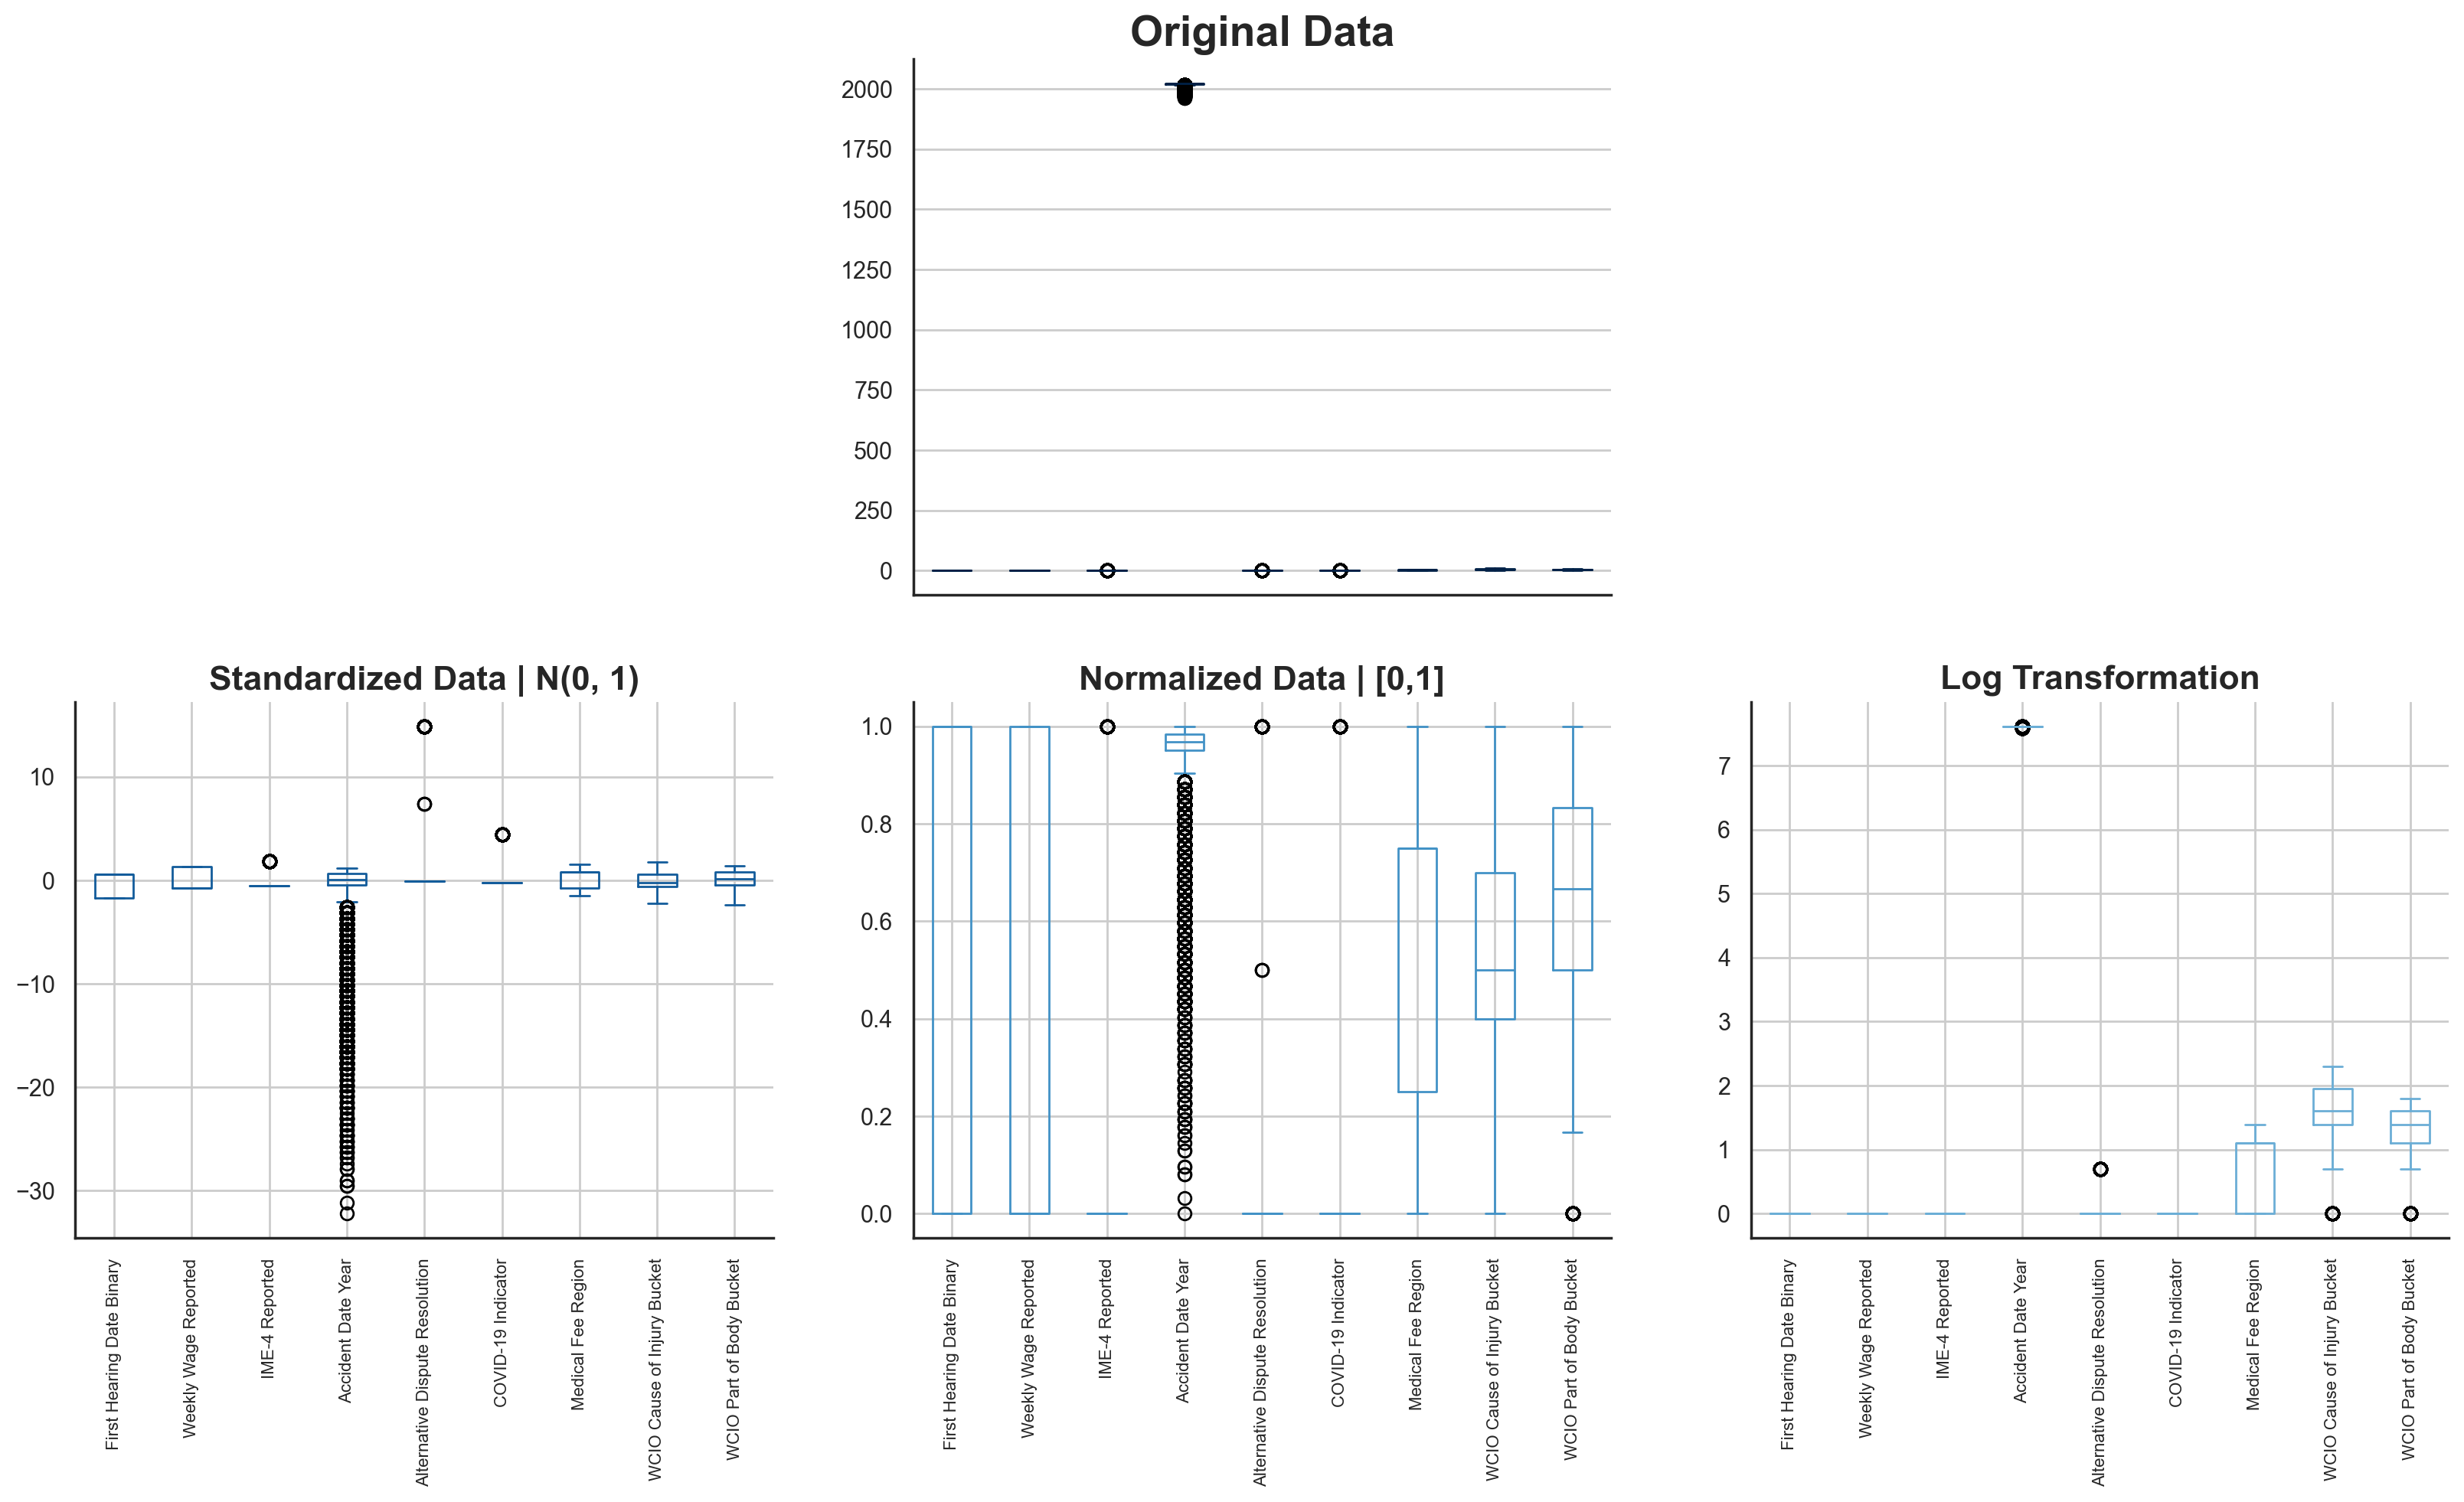

In [12]:
# Plot Boxplots of Original Data, Standardized Data, Normalized Data, and Log Transformation
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Original Data
X_train_ordinal_encoded.boxplot(ax=ax[0, 1], color='#002147')
ax[0, 1].set_title('Original Data', fontsize=20, fontweight='bold')
ax[0, 1].set_xticks([])
ax[0, 0].axis('off')  # Turn off empty plot
ax[0, 2].axis('off')  # Turn off empty plot

# Standardized Data
pd.DataFrame(X_train_standardized, columns=X_train_ordinal_encoded.columns).boxplot(ax=ax[1, 0], color='#135C9B')
ax[1, 0].set_title('Standardized Data | N(0, 1)', fontsize=16, fontweight='bold')
ax[1, 0].tick_params(axis='x', rotation=90, labelsize=8)

# Normalized Data
pd.DataFrame(X_train_norm, columns=X_train_ordinal_encoded.columns).boxplot(ax=ax[1, 1], color='#4292C6')
ax[1, 1].set_title('Normalized Data | [0,1]', fontsize=16, fontweight='bold')
ax[1, 1].tick_params(axis='x', rotation=90, labelsize=8)

# Log Transformation
pd.DataFrame(X_train_log, columns=X_train_ordinal_encoded.columns).boxplot(ax=ax[1, 2], color='#6BAED6')
ax[1, 2].set_title('Log Transformation', fontsize=16, fontweight='bold')
ax[1, 2].tick_params(axis='x', rotation=90, labelsize=8)

# Display the plot
sns.despine(top=True, right=True)
plt.show()

---

# **💡 Modeling**

### **Definition of the Problem**

> The problem consists of predict the WCB’s final decision on what type of injury (Claim Injury Type) should be granted. <br>
> Since the target variable is **category** and **multiclass**, we will use **Classification Models** to solve this problem.

In [13]:
# Function that will print the results of the classification report and the confusion matrix for both datasets (train and validation)
# Additionally, it will save results in a dictionary to compare the results of different models

models_results_train = {}
models_results_val = {}

def classification_metrics(model_name, cv_results,
                           y_train, pred_train, pred_train_proba, 
                           y_val, pred_val, pred_val_proba, classification_report=True):
    
    # Display model name
    display_html(f'<h1 style="text-align: left; margin-bottom: -15px;">{model_name}</h1><br>', raw=True)

    # Display the results of the cross-validation (KFold) - If classification_report=True
    if classification_report:
        # ------------------------------------- Classification Report  -------------------------------------
        print('___________________________________________________________________________________________________________')
        print('                                                     TRAIN                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_train, pred_train, target_names=[str(i) for i in np.unique(y_train)], zero_division=1))  
        # zero_division=1 to avoid warnings -> y_true contains labels that are not present in your predictions (y_pred)
        print('\nAUROC:', round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2)) # 'ovr' for multiclass

        print('___________________________________________________________________________________________________________')
        print('                                                VALIDATION                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_val, pred_val, target_names=[str(i) for i in np.unique(y_val)], zero_division=1))
        print('\nAUROC:', round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2))  # 'ovr' for multiclass
    
    # ----------------------------------- Confusion Matrix for Train and Validation side by side -----------------------------------

    # Confusion Matrix for Train and Validation side by side
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    sns.heatmap(confusion_matrix(y_train, pred_train, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7}, 
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val), ax=ax[0])
    ax[0].set_title('Confusion Matrix [Train]\n', fontsize=12, fontweight='bold')
    ax[0].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[0].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[0].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    sns.heatmap(confusion_matrix(y_val, pred_val, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7},
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val),ax=ax[1])
    ax[1].set_title('Confusion Matrix [Validation]\n', fontsize=12, fontweight='bold')
    ax[1].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[1].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[1].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

    # ----------------------------------- Save the results in a dictionary -----------------------------------
    # List of All Metrics for Classification Problems - Accuracy, Precision, Recall, F1 Score Macro (Kaggle Bechmark), ROC-AUC
    models_results_train[model_name] = {
        'Time of Execution (KFold)': str(cv_results['fit_time'].sum().round(2)) + ' +/-' + str(round(np.std(np.array(cv_results['fit_time'])), 2)),
        'Accuracy': round(accuracy_score(y_train, pred_train), 2),
        'Precision': round(metrics.precision_score(y_train, pred_train, average='macro', zero_division=np.nan), 2),
        'Recall': round(metrics.recall_score(y_train, pred_train, average='macro'), 2),
        'F1 Score': round(metrics.f1_score(y_train, pred_train, average='macro'), 2),
        'AUROC': round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2)
    }

    models_results_val[model_name] = {
        'Accuracy': round(accuracy_score(y_val, pred_val), 2),
        'Precision': round(metrics.precision_score(y_val, pred_val, average='macro', zero_division=np.nan), 2),
        'Recall': round(metrics.recall_score(y_val, pred_val, average='macro'), 2),
        'F1 Score': round(metrics.f1_score(y_val, pred_val, average='macro'), 2),
        'AUROC': round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2)
    }

---

### **Logistic Regression [<sup>[1]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)** <a class='anchor' id='logistic-regression'></a>

In [14]:
# ------------------------------------------------- Logistic Regression -------------------------------------------------
# ################################ Ordinal Encoding (with and without Standardization)
# ============ Original Data
lr_ord = LogisticRegression()
lr_cv_ord = cross_validate(lr_ord,X_train_ordinal_encoded,y_train,cv=5)

# Train the model
lr_ord.fit(X_train_norm, y_train)

# Predictions
lr_ord_pred_train = lr_ord.predict(X_train_norm)
lr_ord_pred_train_proba = lr_ord.predict_proba(X_train_norm)

lr_ord_pred_val = lr_ord.predict(X_val_ordinal_encoded)
lr_ord_pred_val_proba = lr_ord.predict_proba(X_val_ordinal_encoded)

# ============ With Standardization
lr_ord_std = LogisticRegression()
lr_cv_ord_std = cross_validate(lr_ord_std,X_train_standardized,y_train,cv=5)

# Train the model
lr_ord_std.fit(X_train_standardized, y_train)

# Predictions
lr_ord_std_pred_train = lr_ord_std.predict(X_train_standardized)
lr_ord_std_pred_train_proba = lr_ord_std.predict_proba(X_train_standardized)

lr_ord_std_pred_val = lr_ord_std.predict(X_validation_standardized)
lr_ord_std_pred_val_proba = lr_ord_std.predict_proba(X_validation_standardized)


# ============ With Normalization
lr_ord_norm = LogisticRegression()
lr_cv_ord_norm = cross_validate(lr_ord_norm,X_train_norm,y_train,cv=5)

# Train the model
lr_ord_norm.fit(X_train_norm, y_train)

# Predictions
lr_ord_norm_pred_train = lr_ord_norm.predict(X_train_norm)
lr_ord_norm_pred_train_proba = lr_ord_norm.predict_proba(X_train_norm)

lr_ord_norm_pred_val = lr_ord_norm.predict(X_val_ordinal_encoded)
lr_ord_norm_pred_val_proba = lr_ord_norm.predict_proba(X_val_ordinal_encoded)

# ============ With Log Transformation
lr_ord_log = LogisticRegression()
lr_cv_ord_log = cross_validate(lr_ord_log,X_train_log,y_train,cv=5)

# Train the model
lr_ord_log.fit(X_train_log, y_train)

# Predictions
lr_ord_log_pred_train = lr_ord_log.predict(X_train_log)
lr_ord_log_pred_train_proba = lr_ord_log.predict_proba(X_train_log)

lr_ord_log_pred_val = lr_ord_log.predict(X_val_ordinal_encoded)
lr_ord_log_pred_val_proba = lr_ord_log.predict_proba(X_val_ordinal_encoded)

# ################################ One-Hot Encoding
lr_ohe = LogisticRegression()
lr_cv_ohe = cross_validate(lr_ohe,X_train_ohe,y_train,cv=5)

# Train the model
lr_ohe.fit(X_train_ohe, y_train)

# Predictions
lr_ohe_pred_train = lr_ohe.predict(X_train_ohe)
lr_ohe_pred_train_proba = lr_ohe.predict_proba(X_train_ohe)

lr_ohe_pred_val = lr_ohe.predict(X_val_ohe)
lr_ohe_pred_val_proba = lr_ohe.predict_proba(X_val_ohe)

## Time of Execution Logistic Regression = 6m 34.9s

Logistic Regression | Ordinal Encoding (Original Data)

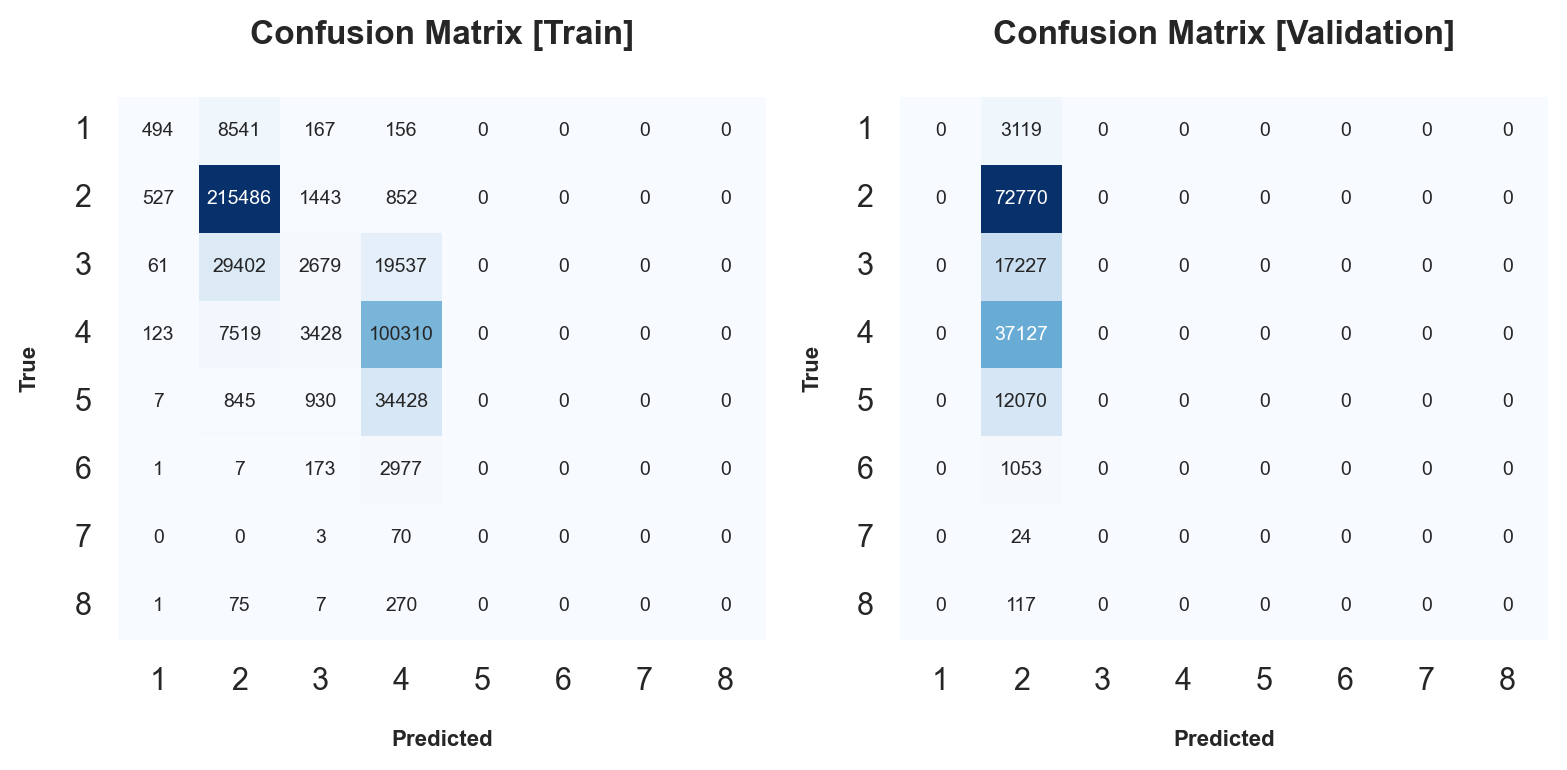

Logistic Regression | Ordinal Encoding (With Standardization)

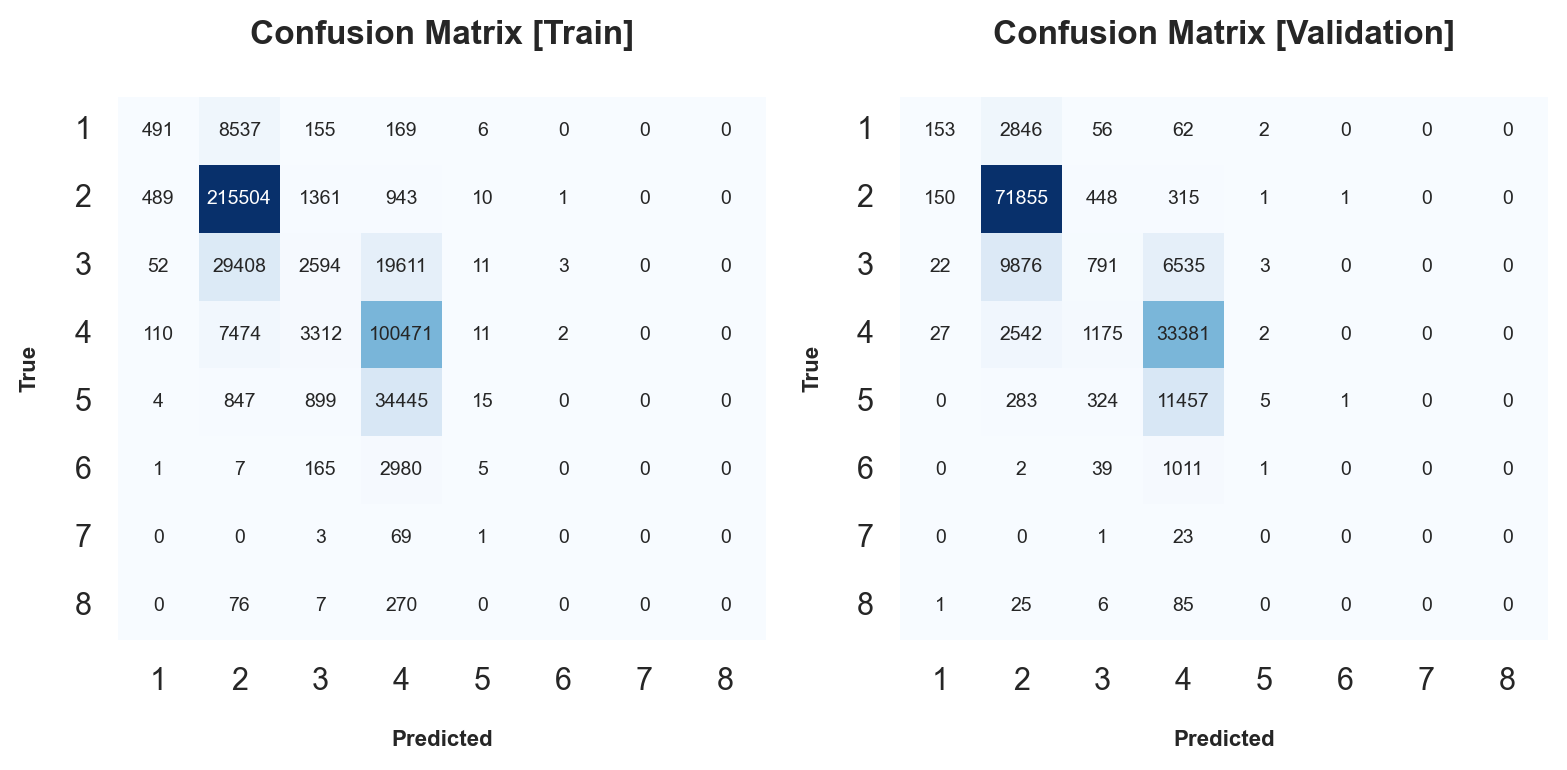

Logistic Regression | Ordinal Encoding (With Normalization)

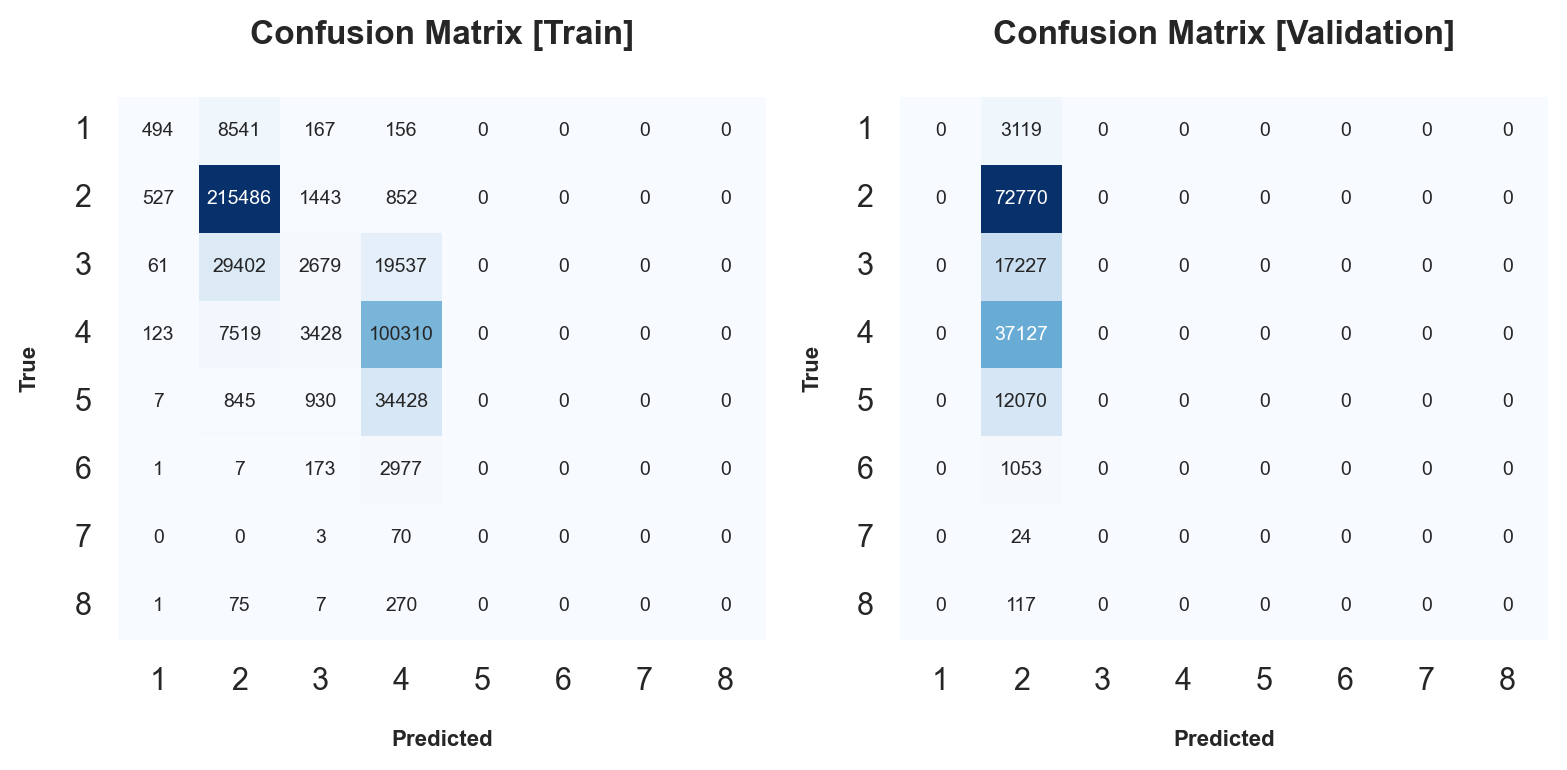

Logistic Regression | Ordinal Encoding (With Log Transformation)

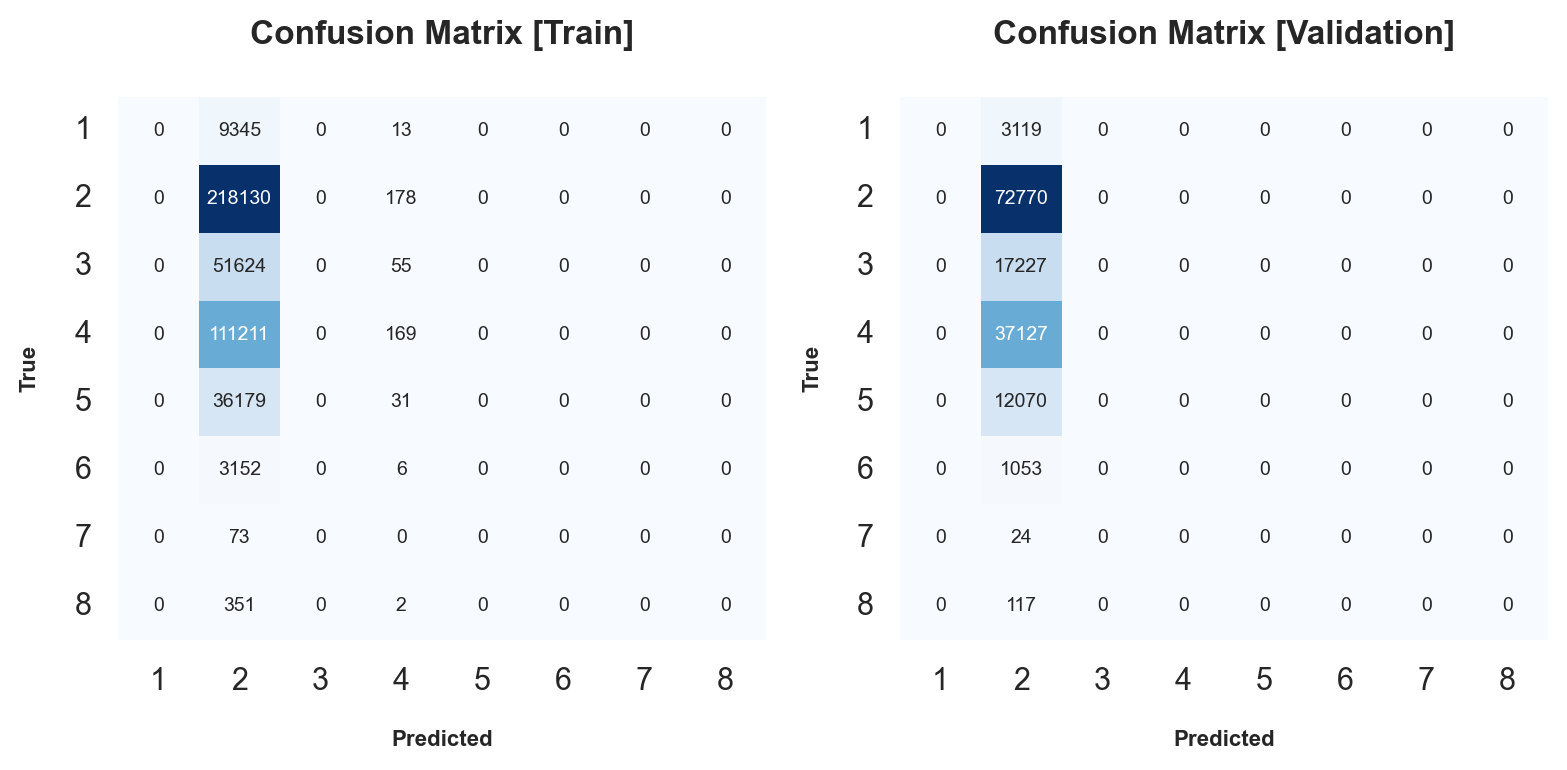

Logistic Regression | One-Hot Encoding

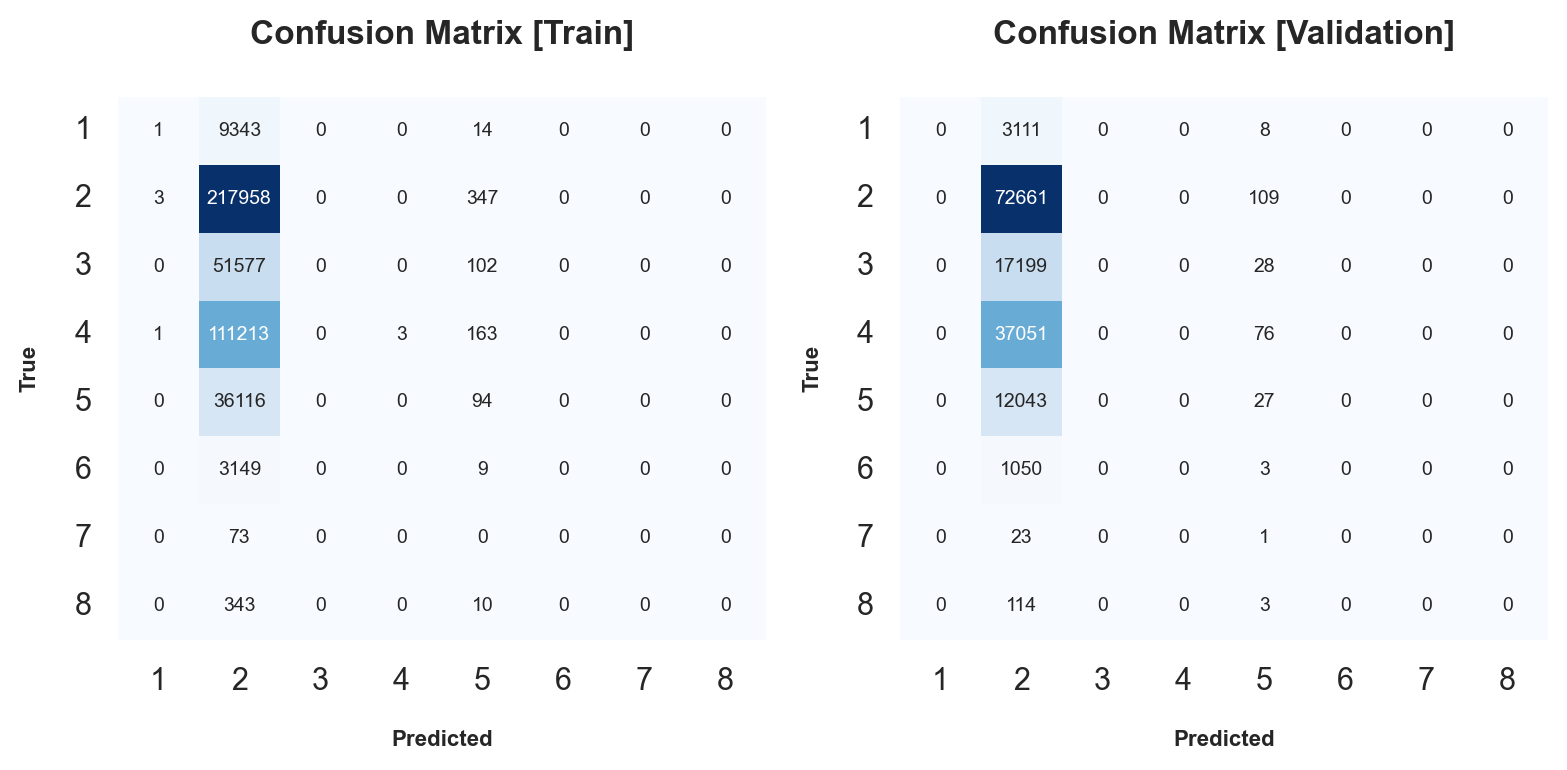

In [15]:
# Classification Metrics & Confusion Matrix
classification_metrics('Logistic Regression | Ordinal Encoding (Original Data)', lr_cv_ord,
                       y_train, lr_ord_pred_train, lr_ord_pred_train_proba, 
                       y_val, lr_ord_pred_val, lr_ord_pred_val_proba, classification_report=False)

classification_metrics('Logistic Regression | Ordinal Encoding (With Standardization)', lr_cv_ord_std,
                        y_train, lr_ord_std_pred_train, lr_ord_std_pred_train_proba, 
                        y_val, lr_ord_std_pred_val, lr_ord_std_pred_val_proba, classification_report=False)

classification_metrics('Logistic Regression | Ordinal Encoding (With Normalization)', lr_cv_ord_norm,
                        y_train, lr_ord_norm_pred_train, lr_ord_norm_pred_train_proba, 
                        y_val, lr_ord_norm_pred_val, lr_ord_norm_pred_val_proba, classification_report=False)

classification_metrics('Logistic Regression | Ordinal Encoding (With Log Transformation)', lr_cv_ord_log,
                        y_train, lr_ord_log_pred_train, lr_ord_log_pred_train_proba, 
                        y_val, lr_ord_log_pred_val, lr_ord_log_pred_val_proba, classification_report=False)

classification_metrics('Logistic Regression | One-Hot Encoding', lr_cv_ohe,
                        y_train, lr_ohe_pred_train, lr_ohe_pred_train_proba, 
                        y_val, lr_ohe_pred_val, lr_ohe_pred_val_proba, classification_report=False)

##############################################################################################################################################

In [16]:
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train, df_results_val, 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Logistic Regression Model')

Results of the Logistic Regression Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Logistic Regression | Ordinal Encoding (Original Data) 
 30.51 +/-0.47 
 0.74 
 0.54 
 0.25 
 0.23 
 0.88 
 
 
 Logistic Regression | Ordinal Encoding (With Standardization) 
 20.18 +/-0.13 
 0.74 
 0.41 
 0.25 
 0.23 
 0.88 
 
 
 Logistic Regression | Ordinal Encoding (With Normalization) 
 26.9 +/-0.36 
 0.74 
 0.54 
 0.25 
 0.23 
 0.88 
 
 
 Logistic Regression | Ordinal Encoding (With Log Transformation) 
 25.45 +/-0.25 
 0.51 
 0.44 
 0.13 
 0.08 
 0.63 
 
 
 Logistic Regression | One-Hot Encoding 
 80.42 +/-0.51 
 0.51 
 0.46 
 0.13 
 0.08 
 0.66 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Logistic Regression | Ordinal Encoding (Original Data) 
 0.51 
 0.51 
 0.12 
 0.08 
 0.50 
 
 
 Logistic Regression | Ordinal Encoding (With Standardization) 
 0.74 
 0.42 
 0.25 
 0.23 
 0.88 
 
 
 Logistic Regression | Ordinal Encoding (With Normalization) 
 0.51 
 0.51 
 0.12 
 0.08 
 0.50 
 
 
 Logistic Regression | Ordinal Encoding (With Log Transformation) 
 0.51 
 0.51 
 0.12 
 0.08 
 0.55 
 
 
 Logistic Regression | One-Hot Encoding 
 0.51 
 0.31 
 0.13 
 0.08 
 0.64

---

### **Naive Bayes [<sup>[2]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)** <a class='anchor' id='naive-bayes'></a>

> For the Naive Bayes model, we will use two different approaches: **Categorical** and **Gaussian**.
> - **Categorical**: This model is used when the features are categorical.
> - **Gaussian**: This model is used when the features are continuous.


> In this case, we will don't modeling with the Standardized/Normalized/Log-transformed Data, since the **Naive Bayes model doesn't require it**.

#### **Naive Bayes - Categorical** <sup>[**[2.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.CategoricalNB.html)</sup> <a class='anchor' id='naive-bayes-categorical'></a>

In [17]:
# ------------------------------------------------- Naïve Bayes [CategoricalNB] -------------------------------------------------
# ################################ Ordinal Encoding 
# ============ Original Data
nb_ord = CategoricalNB()
nb_cv_ord = cross_validate(nb_ord,X_train_ordinal_encoded,y_train,cv=5)

# Train the model
nb_ord.fit(X_train_ordinal_encoded, y_train)

# Predictions
nb_ord_pred_train = nb_ord.predict(X_train_ordinal_encoded)
nb_ord_pred_train_proba = nb_ord.predict_proba(X_train_ordinal_encoded)

nb_ord_pred_val = nb_ord.predict(X_val_ordinal_encoded)
nb_ord_pred_val_proba = nb_ord.predict_proba(X_val_ordinal_encoded)

# ============ One-Hot Encoding
nb_ohe = CategoricalNB()
nb_cv_ohe = cross_validate(nb_ohe,X_train_ohe,y_train,cv=5)

# Train the model
nb_ohe.fit(X_train_ohe, y_train)

# Predictions
nb_ohe_pred_train = nb_ohe.predict(X_train_ohe)
nb_ohe_pred_train_proba = nb_ohe.predict_proba(X_train_ohe)

nb_ohe_pred_val = nb_ohe.predict(X_val_ohe)
nb_ohe_pred_val_proba = nb_ohe.predict_proba(X_val_ohe)

## Time of Execution Naïve Bayes [CategoricalNB] = 14.8 seconds

In [18]:

"""Trying to Oversample because of the target variable having disproportionate classes
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, roc_auc_score
# ------------------------------------------------- Naïve Bayes [CategoricalNB] -------------------------------------------------
# Apply Random Oversampling to Ordinal Encoded Data
ros = RandomOverSampler(random_state=2024)
X_train_ordinal_resampled, y_train_resampled = ros.fit_resample(X_train_ordinal_encoded, y_train)

# ============ Ordinal Encoding (Oversampled Data)
nb_ord = CategoricalNB()

# Cross-validation on oversampled data
nb_cv_ord = cross_validate(nb_ord, X_train_ordinal_resampled, y_train_resampled, cv=5)

# Train the model on oversampled data
nb_ord.fit(X_train_ordinal_resampled, y_train_resampled)

# Predictions on the original training set and validation set
nb_ord_pred_train = nb_ord.predict(X_train_ordinal_encoded)
nb_ord_pred_train_proba = nb_ord.predict_proba(X_train_ordinal_encoded)

nb_ord_pred_val = nb_ord.predict(X_val_ordinal_encoded)
nb_ord_pred_val_proba = nb_ord.predict_proba(X_val_ordinal_encoded)

# Calculate F1 and AUROC for training and validation sets
train_f1 = f1_score(y_train, nb_ord_pred_train, average='macro')
val_f1 = f1_score(y_val, nb_ord_pred_val, average='macro')

train_auroc = roc_auc_score(y_train, nb_ord_pred_train_proba, average='macro', multi_class='ovr')
val_auroc = roc_auc_score(y_val, nb_ord_pred_val_proba, average='macro', multi_class='ovr')

print("Ordinal Encoding (Oversampled) - Training F1 Score:", train_f1)
print("Ordinal Encoding (Oversampled) - Validation F1 Score:", val_f1)
print("Ordinal Encoding (Oversampled) - Training AUROC:", train_auroc)
print("Ordinal Encoding (Oversampled) - Validation AUROC:", val_auroc)

# ============ One-Hot Encoding (Oversampled Data)
X_train_ohe_resampled, y_train_resampled_ohe = ros.fit_resample(X_train_ohe, y_train)

nb_ohe = CategoricalNB()

# Cross-validation on oversampled data
nb_cv_ohe = cross_validate(nb_ohe, X_train_ohe_resampled, y_train_resampled_ohe, cv=5)

# Train the model on oversampled data
nb_ohe.fit(X_train_ohe_resampled, y_train_resampled_ohe)

# Predictions on the original training set and validation set
nb_ohe_pred_train = nb_ohe.predict(X_train_ohe)
nb_ohe_pred_train_proba = nb_ohe.predict_proba(X_train_ohe)

nb_ohe_pred_val = nb_ohe.predict(X_val_ohe)
nb_ohe_pred_val_proba = nb_ohe.predict_proba(X_val_ohe)

# Calculate F1 and AUROC for training and validation sets
train_f1_ohe = f1_score(y_train, nb_ohe_pred_train, average='macro')
val_f1_ohe = f1_score(y_val, nb_ohe_pred_val, average='macro')

train_auroc_ohe = roc_auc_score(y_train, nb_ohe_pred_train_proba, average='macro', multi_class='ovr')
val_auroc_ohe = roc_auc_score(y_val, nb_ohe_pred_val_proba, average='macro', multi_class='ovr')

print("One-Hot Encoding (Oversampled) - Training F1 Score:", train_f1_ohe)
print("One-Hot Encoding (Oversampled) - Validation F1 Score:", val_f1_ohe)
print("One-Hot Encoding (Oversampled) - Training AUROC:", train_auroc_ohe)
print("One-Hot Encoding (Oversampled) - Validation AUROC:", val_auroc_ohe)
"""


'Trying to Oversample because of the target variable having disproportionate classes\nfrom imblearn.over_sampling import RandomOverSampler\nfrom sklearn.naive_bayes import CategoricalNB\nfrom sklearn.model_selection import cross_validate\nfrom sklearn.metrics import f1_score, roc_auc_score\n# ------------------------------------------------- Naïve Bayes [CategoricalNB] -------------------------------------------------\n# Apply Random Oversampling to Ordinal Encoded Data\nros = RandomOverSampler(random_state=2024)\nX_train_ordinal_resampled, y_train_resampled = ros.fit_resample(X_train_ordinal_encoded, y_train)\n\n# ============ Ordinal Encoding (Oversampled Data)\nnb_ord = CategoricalNB()\n\n# Cross-validation on oversampled data\nnb_cv_ord = cross_validate(nb_ord, X_train_ordinal_resampled, y_train_resampled, cv=5)\n\n# Train the model on oversampled data\nnb_ord.fit(X_train_ordinal_resampled, y_train_resampled)\n\n# Predictions on the original training set and validation set\nnb_ord_

Naïve Bayes [CategoricalNB] | Ordinal Encoding (Original Data)

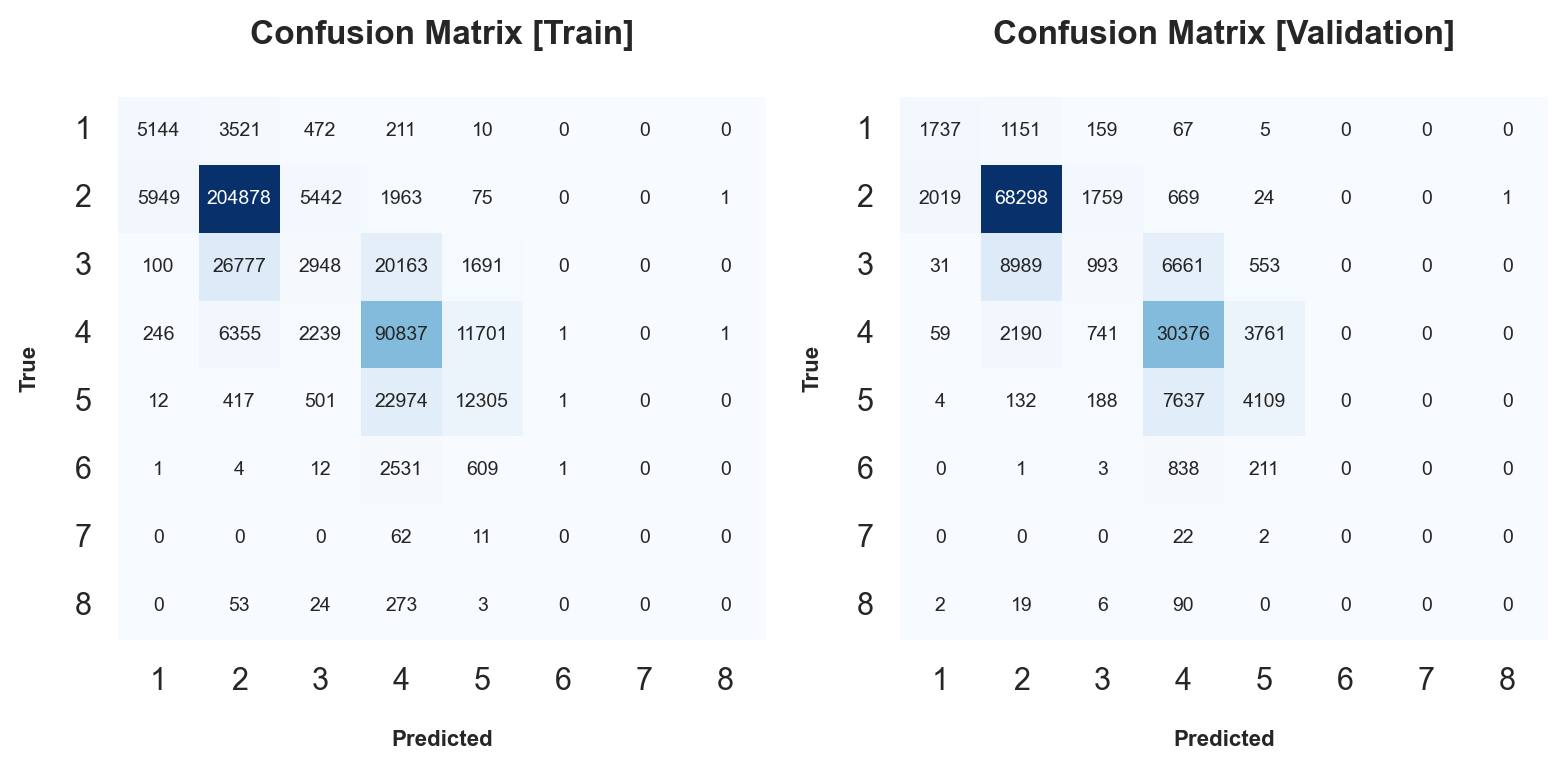

Naïve Bayes [CategoricalNB] | One-Hot Encoding

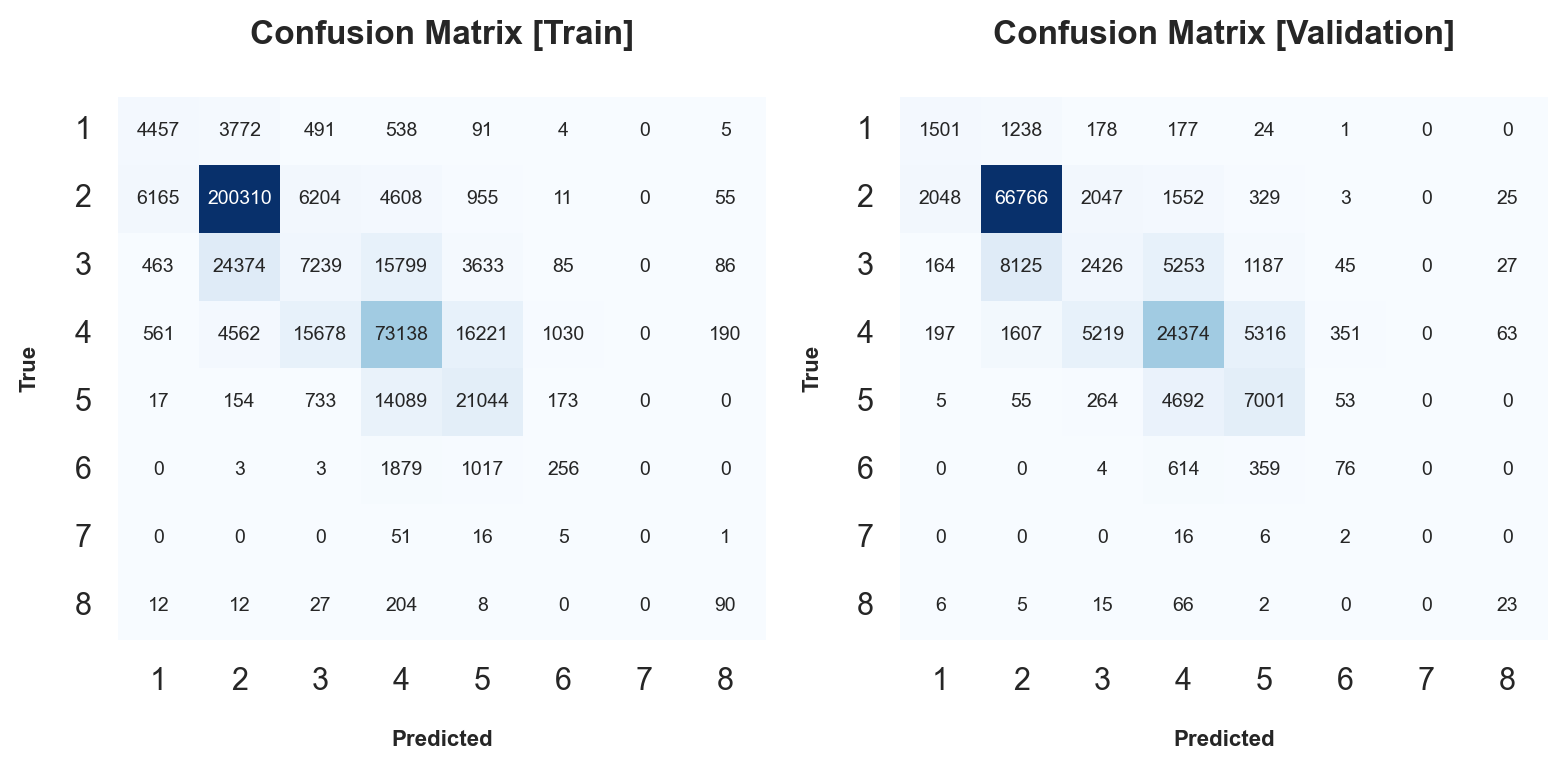

Results of the Naïve Bayes [CategoricalNB] Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Naïve Bayes [CategoricalNB] | Ordinal Encoding (Original Data) 
 0.65 +/-0.0 
 0.73 
 0.43 
 0.34 
 0.32 
 0.9 
 
 
 Naïve Bayes [CategoricalNB] | One-Hot Encoding 
 6.52 +/-0.01 
 0.71 
 0.43 
 0.39 
 0.38 
 0.91 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Naïve Bayes [CategoricalNB] | Ordinal Encoding (Original Data) 
 0.74 
 0.45 
 0.34 
 0.33 
 0.9 
 
 
 Naïve Bayes [CategoricalNB] | One-Hot Encoding 
 0.71 
 0.42 
 0.38 
 0.37 
 0.9

In [19]:
# Classification Metrics & Confusion Matrix
classification_metrics('Naïve Bayes [CategoricalNB] | Ordinal Encoding (Original Data)', nb_cv_ord,
                       y_train, nb_ord_pred_train, nb_ord_pred_train_proba, 
                       y_val, nb_ord_pred_val, nb_ord_pred_val_proba, classification_report=False)

classification_metrics('Naïve Bayes [CategoricalNB] | One-Hot Encoding', nb_cv_ohe,
                        y_train, nb_ohe_pred_train, nb_ohe_pred_train_proba, 
                        y_val, nb_ohe_pred_val, nb_ohe_pred_val_proba, classification_report=False)

# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train[5:], df_results_val[5:],
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Naïve Bayes [CategoricalNB] Model')

#### **Naive Bayes - Gaussian** <sup>[**[2.2]**](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)</sup> <a class='anchor' id='naive-bayes-gaussian'></a>

In [20]:
# ------------------------------------------------- Naïve Bayes [GaussianNB] -------------------------------------------------
# ################################ Ordinal Encoding
# ============ Original Data
gnb_ord = GaussianNB(var_smoothing=0.0001)
gnb_cv_ord = cross_validate(gnb_ord,X_train_ordinal_encoded,y_train,cv=5)

# Train the model
gnb_ord.fit(X_train_ordinal_encoded, y_train)

# Predictions
gnb_ord_pred_train = gnb_ord.predict(X_train_ordinal_encoded)
gnb_ord_pred_train_proba = gnb_ord.predict_proba(X_train_ordinal_encoded)

gnb_ord_pred_val = gnb_ord.predict(X_val_ordinal_encoded)
gnb_ord_pred_val_proba = gnb_ord.predict_proba(X_val_ordinal_encoded)

# ################################ One-Hot Encoding
gnb_ohe = GaussianNB(var_smoothing=0.0001)
gnb_cv_ohe = cross_validate(gnb_ohe,X_train_ohe,y_train,cv=5)

# Train the model
gnb_ohe.fit(X_train_ohe, y_train)

# Predictions
gnb_ohe_pred_train = gnb_ohe.predict(X_train_ohe)
gnb_ohe_pred_train_proba = gnb_ohe.predict_proba(X_train_ohe)

gnb_ohe_pred_val = gnb_ohe.predict(X_val_ohe)
gnb_ohe_pred_val_proba = gnb_ohe.predict_proba(X_val_ohe)

## Time of Execution Naïve Bayes [GaussianNB] = 29.6s

Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data)

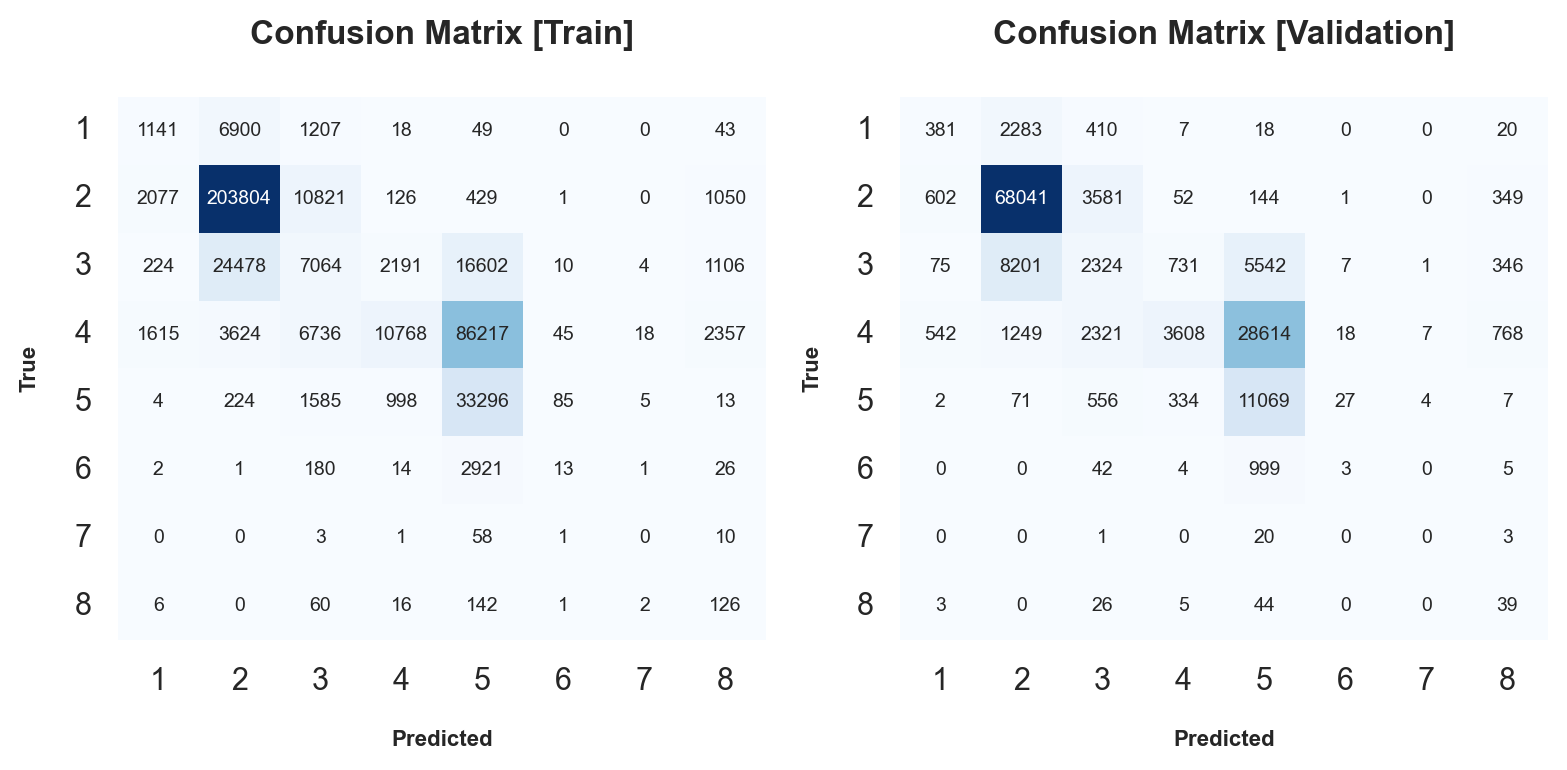

Naïve Bayes [GaussianNB] | One-Hot Encoding

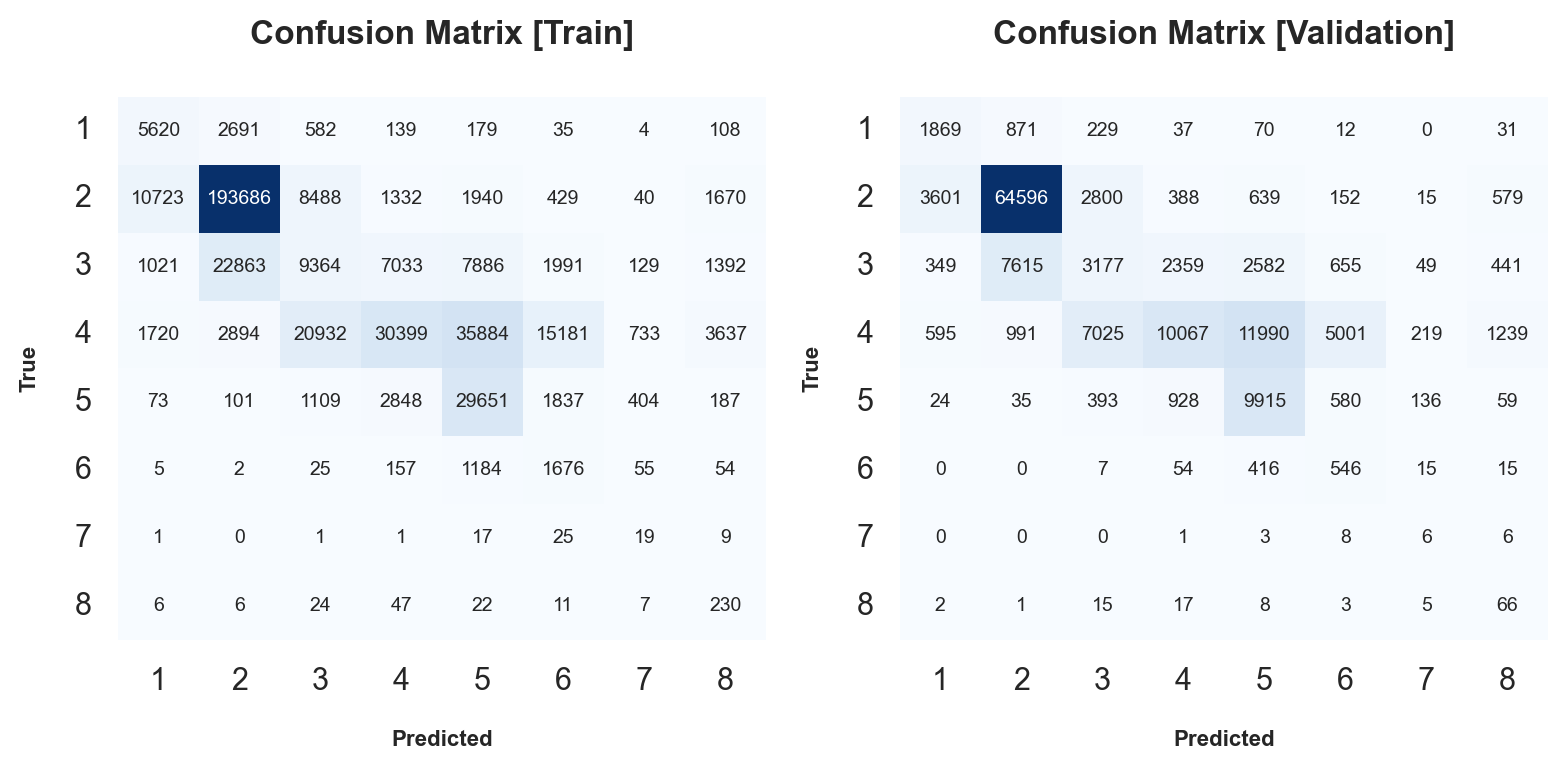

Results of the Naïve Bayes [GaussianNB] Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data) 
 0.25 +/-0.0 
 0.6 
 0.31 
 0.32 
 0.23 
 0.88 
 
 
 Naïve Bayes [GaussianNB] | One-Hot Encoding 
 1.96 +/-0.01 
 0.63 
 0.33 
 0.53 
 0.33 
 0.9 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data) 
 0.60 
 0.30 
 0.32 
 0.23 
 0.88 
 
 
 Naïve Bayes [GaussianNB] | One-Hot Encoding 
 0.63 
 0.33 
 0.51 
 0.33 
 0.90

In [21]:
# Classification Metrics & Confusion Matrix
classification_metrics('Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data)', gnb_cv_ord,
                       y_train, gnb_ord_pred_train, gnb_ord_pred_train_proba, 
                       y_val, gnb_ord_pred_val, gnb_ord_pred_val_proba, classification_report=False)

classification_metrics('Naïve Bayes [GaussianNB] | One-Hot Encoding', gnb_cv_ohe,
                        y_train, gnb_ohe_pred_train, gnb_ohe_pred_train_proba, 
                        y_val, gnb_ohe_pred_val, gnb_ohe_pred_val_proba, classification_report=False)

# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train[7:], df_results_val[7:],
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Naïve Bayes [GaussianNB] Model')

In [22]:
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train[3:], df_results_val[3:], 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Naïve Bayes Model')

Results of the Naïve Bayes Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Logistic Regression | Ordinal Encoding (With Log Transformation) 
 25.45 +/-0.25 
 0.51 
 0.44 
 0.13 
 0.08 
 0.63 
 
 
 Logistic Regression | One-Hot Encoding 
 80.42 +/-0.51 
 0.51 
 0.46 
 0.13 
 0.08 
 0.66 
 
 
 Naïve Bayes [CategoricalNB] | Ordinal Encoding (Original Data) 
 0.65 +/-0.0 
 0.73 
 0.43 
 0.34 
 0.32 
 0.9 
 
 
 Naïve Bayes [CategoricalNB] | One-Hot Encoding 
 6.52 +/-0.01 
 0.71 
 0.43 
 0.39 
 0.38 
 0.91 
 
 
 Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data) 
 0.25 +/-0.0 
 0.6 
 0.31 
 0.32 
 0.23 
 0.88 
 
 
 Naïve Bayes [GaussianNB] | One-Hot Encoding 
 1.96 +/-0.01 
 0.63 
 0.33 
 0.53 
 0.33 
 0.9 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Logistic Regression | Ordinal Encoding (With Log Transformation) 
 0.51 
 0.51 
 0.12 
 0.08 
 0.55 
 
 
 Logistic Regression | One-Hot Encoding 
 0.51 
 0.31 
 0.13 
 0.08 
 0.64 
 
 
 Naïve Bayes [CategoricalNB] | Ordinal Encoding (Original Data) 
 0.74 
 0.45 
 0.34 
 0.33 
 0.90 
 
 
 Naïve Bayes [CategoricalNB] | One-Hot Encoding 
 0.71 
 0.42 
 0.38 
 0.37 
 0.90 
 
 
 Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data) 
 0.60 
 0.30 
 0.32 
 0.23 
 0.88 
 
 
 Naïve Bayes [GaussianNB] | One-Hot Encoding 
 0.63 
 0.33 
 0.51 
 0.33 
 0.90

In [23]:
"""Testing for class imbalabnce"""
# Assuming y_train is your target variable for the training set
class_counts = pd.Series(y_train).value_counts(normalize=True)  # Relative frequency
print(class_counts)

Claim Injury Type
2    0.507081
4    0.258711
3    0.120039
5    0.084108
1    0.021737
6    0.007335
8    0.000820
7    0.000170
Name: proportion, dtype: float64


---

### **K-Nearest Neighbors (KNN) [<sup>[3]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)** <a class='anchor' id='knn'></a>

#### **KNN - Brute Force** <sup>[**[3.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-brute-force'></a>

In [24]:
# ------------------------------------------------- K-Nearest Neighbors [Brute Force Algorithm] -------------------------------------------------
# ################################ Ordinal Encoding
# ============ Original Data
knn_ord = KNeighborsClassifier(algorithm='brute')
knn_cv_ord = cross_validate(knn_ord,X_train_ordinal_encoded,y_train,cv=5)

# Train the model
knn_ord.fit(X_train_ordinal_encoded, y_train)

# Predictions
knn_ord_pred_train = knn_ord.predict(X_train_ordinal_encoded)
knn_ord_pred_train_proba = knn_ord.predict_proba(X_train_ordinal_encoded)

knn_ord_pred_val = knn_ord.predict(X_val_ordinal_encoded)
knn_ord_pred_val_proba = knn_ord.predict_proba(X_val_ordinal_encoded)

# ============ With Standardization
knn_ord_std = KNeighborsClassifier(algorithm='brute')
knn_cv_ord_std = cross_validate(knn_ord_std,X_train_standardized,y_train,cv=5)

# Train the model
knn_ord_std.fit(X_train_standardized, y_train)

# Predictions
knn_ord_std_pred_train = knn_ord_std.predict(X_train_standardized)
knn_ord_std_pred_train_proba = knn_ord_std.predict_proba(X_train_standardized)

knn_ord_std_pred_val = knn_ord_std.predict(X_validation_standardized)
knn_ord_std_pred_val_proba = knn_ord_std.predict_proba(X_validation_standardized)

# ============ With Normalization
knn_ord_norm = KNeighborsClassifier(algorithm='brute')
knn_cv_ord_norm = cross_validate(knn_ord_norm,X_train_norm,y_train,cv=5)

# Train the model
knn_ord_norm.fit(X_train_norm, y_train)

# Predictions
knn_ord_norm_pred_train = knn_ord_norm.predict(X_train_norm)
knn_ord_norm_pred_train_proba = knn_ord_norm.predict_proba(X_train_norm)

knn_ord_norm_pred_val = knn_ord_norm.predict(X_val_ordinal_encoded)
knn_ord_norm_pred_val_proba = knn_ord_norm.predict_proba(X_val_ordinal_encoded)

# ============ With Log Transformation
knn_ord_log = KNeighborsClassifier(algorithm='brute')
knn_cv_ord_log = cross_validate(knn_ord_log,X_train_log,y_train,cv=5)

# Train the model
knn_ord_log.fit(X_train_log, y_train)

# Predictions
knn_ord_log_pred_train = knn_ord_log.predict(X_train_log)
knn_ord_log_pred_train_proba = knn_ord_log.predict_proba(X_train_log)

knn_ord_log_pred_val = knn_ord_log.predict(X_val_ordinal_encoded)
knn_ord_log_pred_val_proba = knn_ord_log.predict_proba(X_val_ordinal_encoded)

# ################################ One-Hot Encoding
knn_ohe = KNeighborsClassifier(algorithm='brute')
knn_cv_ohe = cross_validate(knn_ohe,X_train_ohe,y_train,cv=5)

# Train the model
knn_ohe.fit(X_train_ohe, y_train)

# Predictions
knn_ohe_pred_train = knn_ohe.predict(X_train_ohe)
knn_ohe_pred_train_proba = knn_ohe.predict_proba(X_train_ohe)

knn_ohe_pred_val = knn_ohe.predict(X_val_ohe)
knn_ohe_pred_val_proba = knn_ohe.predict_proba(X_val_ohe)

## Time of Execution KNN (Brute Force Algorithm) = 32m 15.5s (+++++)

K-Nearest Neighbors [Brute Force Algorithm] | Ordinal Encoding (Original Data)

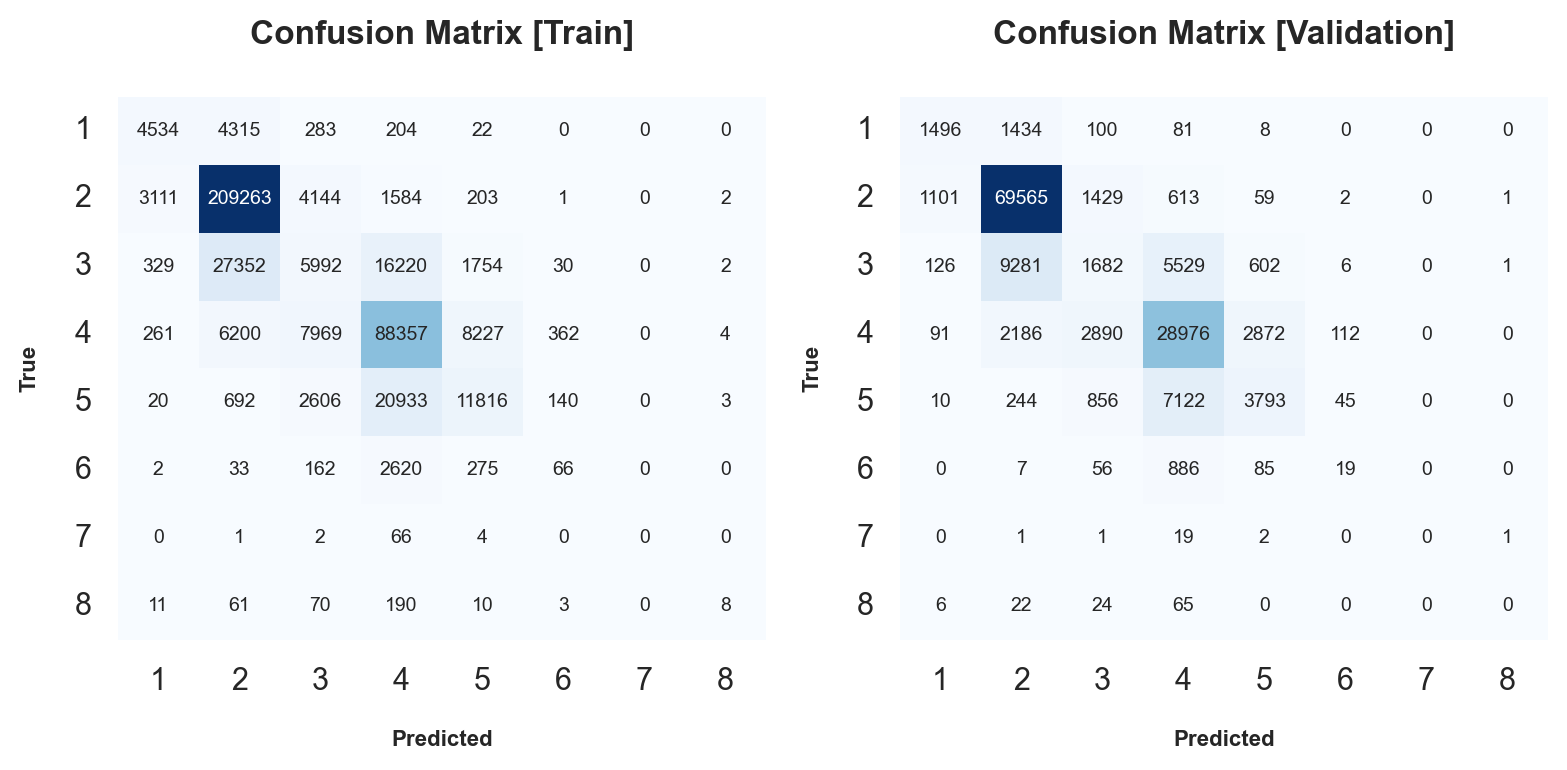

K-Nearest Neighbors [Brute Force Algorithm] | Ordinal Encoding (With Standardization)

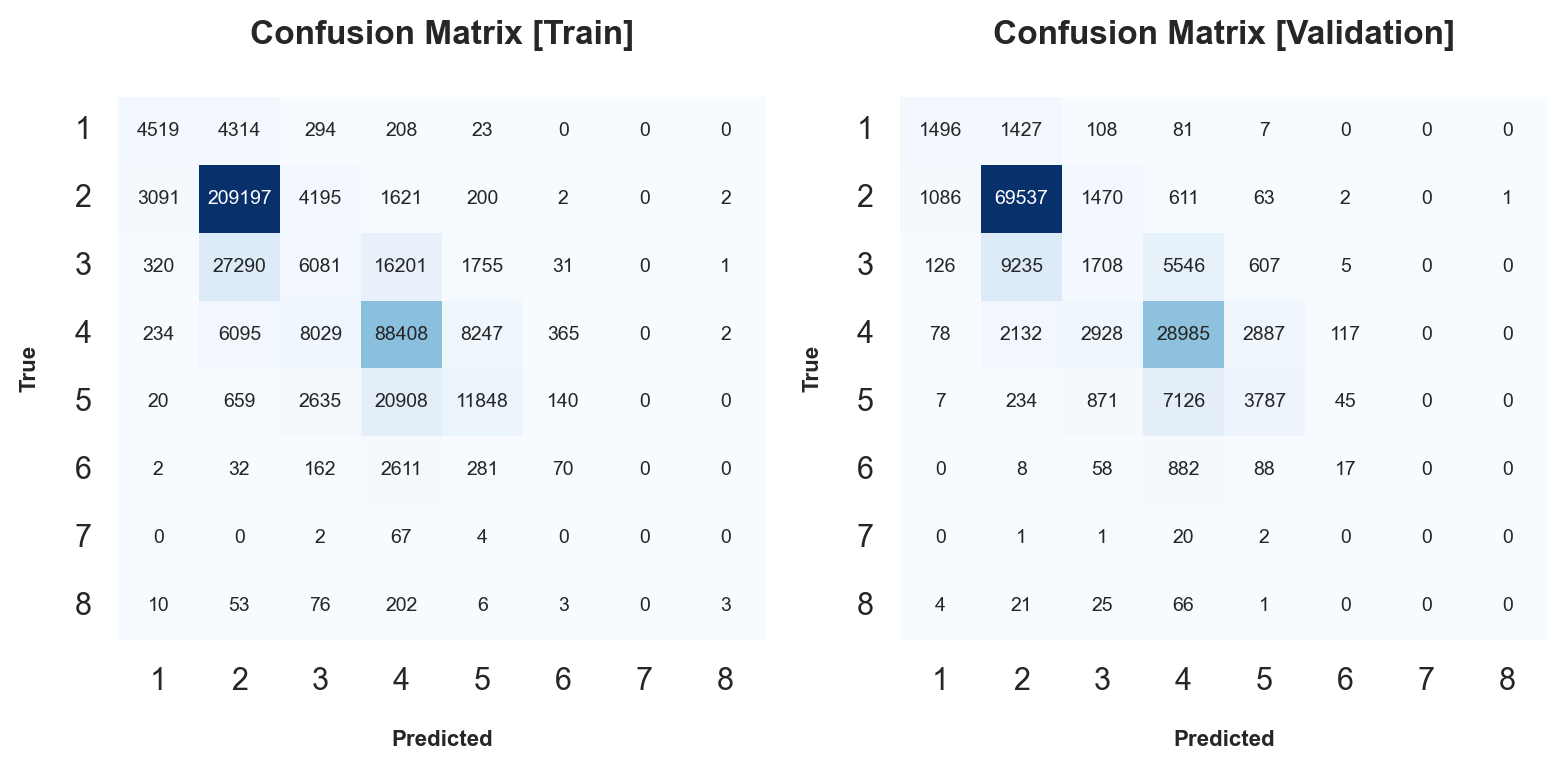

K-Nearest Neighbors [Brute Force Algorithm] | Ordinal Encoding (With Normalization)

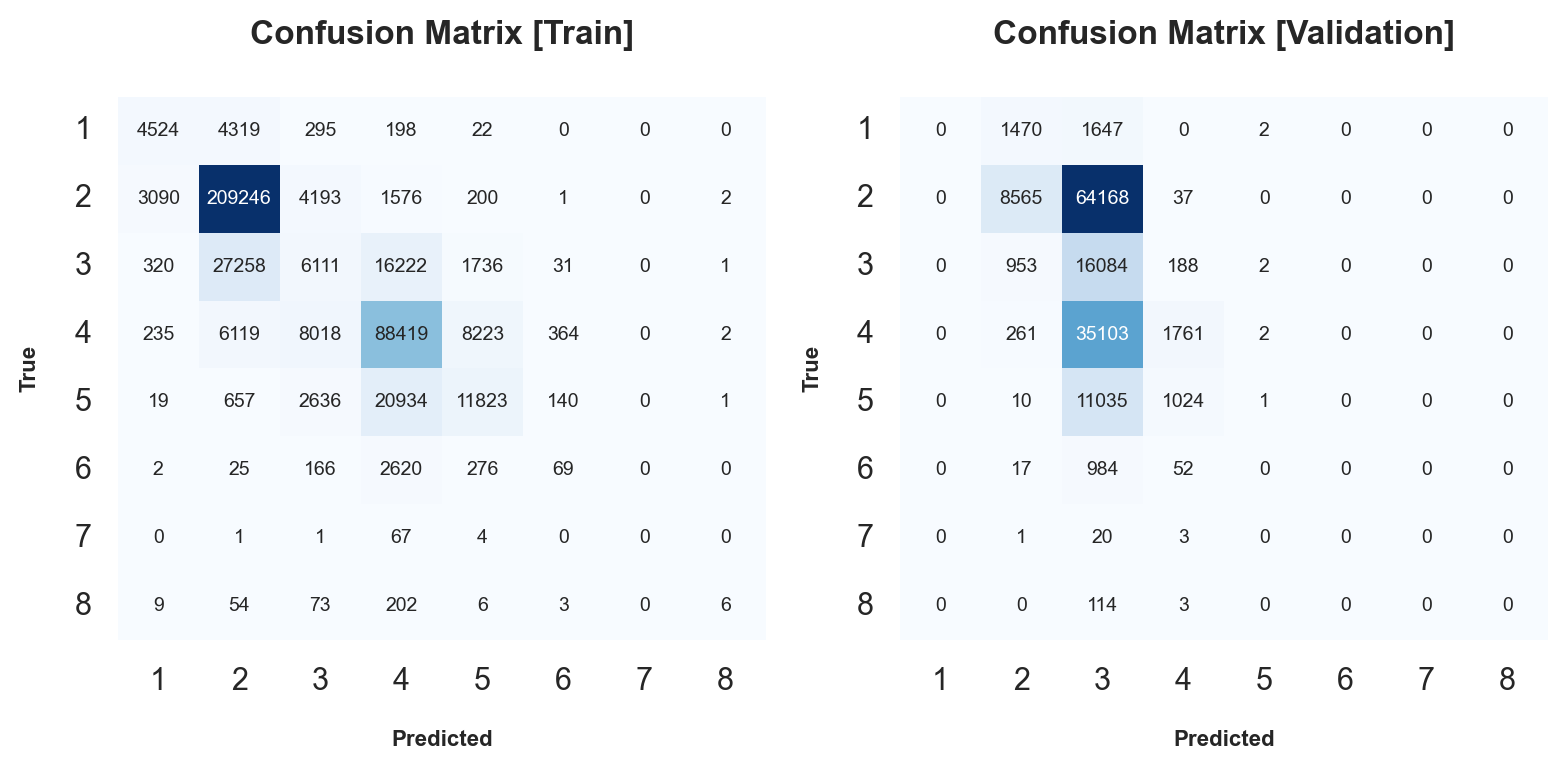

K-Nearest Neighbors [Brute Force Algorithm] | Ordinal Encoding (With Log Transformation)

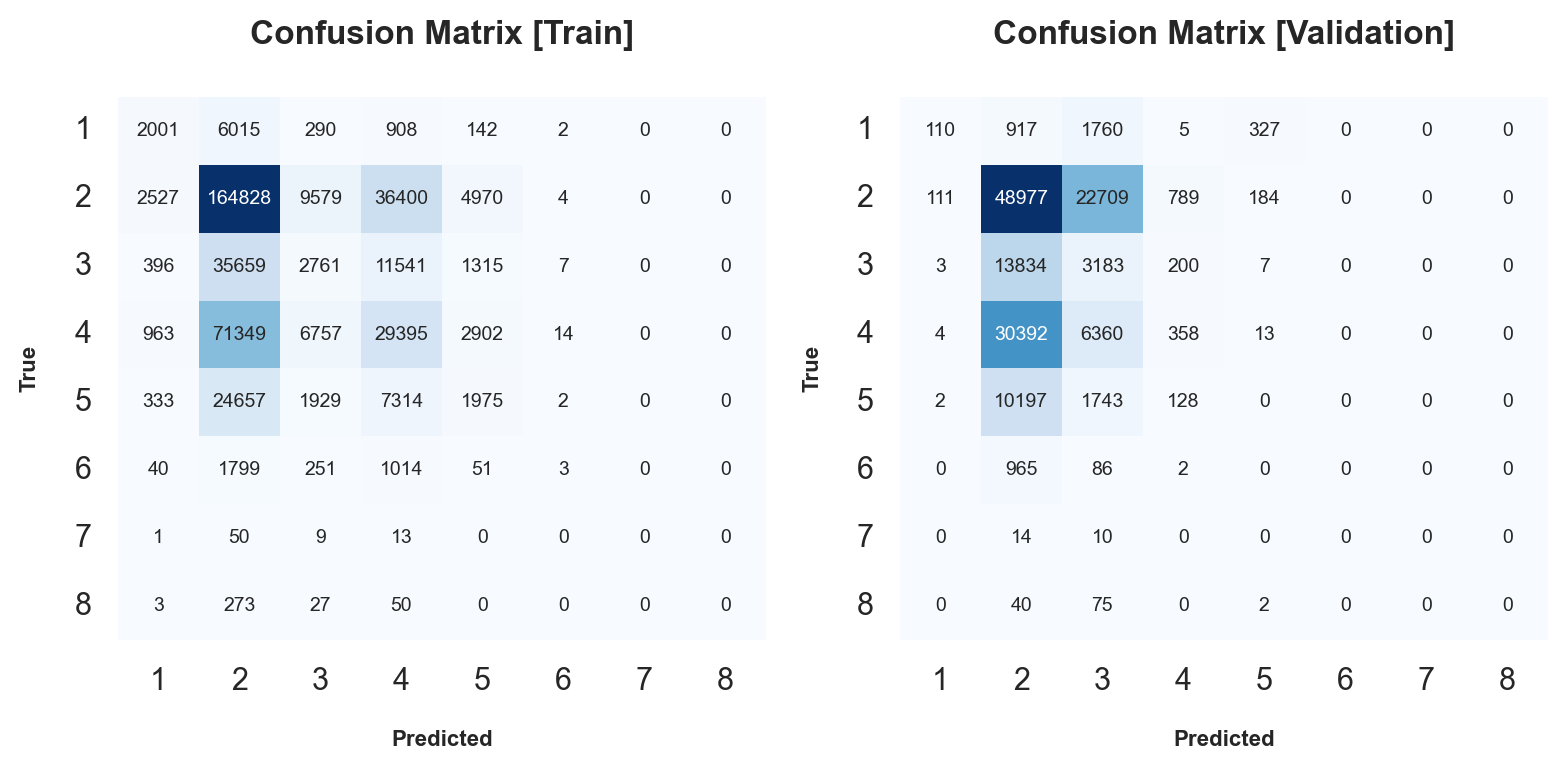

K-Nearest Neighbors [Brute Force Algorithm] | One-Hot Encoding

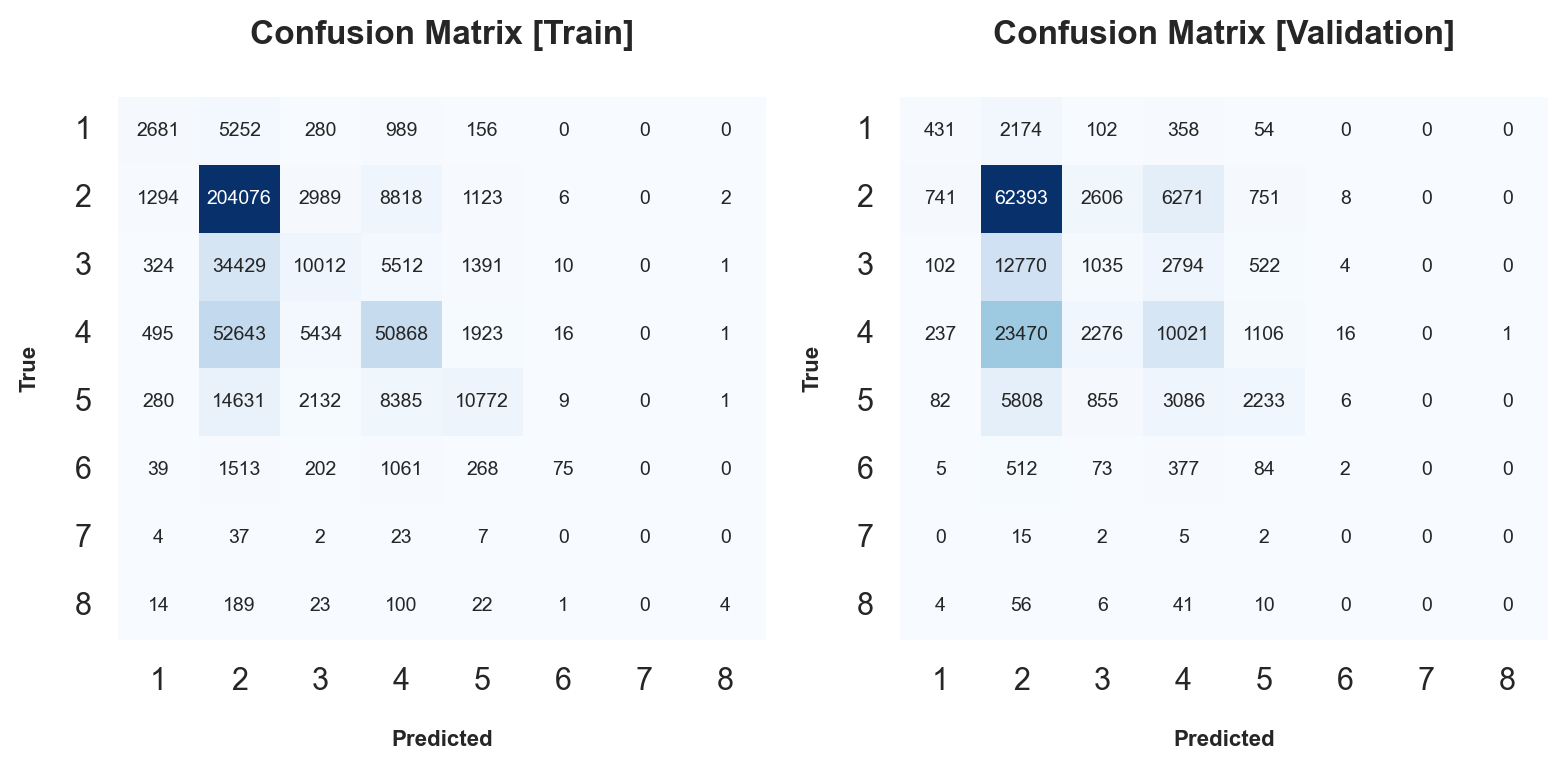

Results of the K-Nearest Neighbors [Brute Force Algorithm] Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC

In [25]:
# Classification Metrics & Confusion Matrix
classification_metrics('K-Nearest Neighbors [Brute Force Algorithm] | Ordinal Encoding (Original Data)', knn_cv_ord,
                       y_train, knn_ord_pred_train, knn_ord_pred_train_proba, 
                       y_val, knn_ord_pred_val, knn_ord_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors [Brute Force Algorithm] | Ordinal Encoding (With Standardization)', knn_cv_ord_std,
                        y_train, knn_ord_std_pred_train, knn_ord_std_pred_train_proba, 
                        y_val, knn_ord_std_pred_val, knn_ord_std_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors [Brute Force Algorithm] | Ordinal Encoding (With Normalization)', knn_cv_ord_norm,
                        y_train, knn_ord_norm_pred_train, knn_ord_norm_pred_train_proba, 
                        y_val, knn_ord_norm_pred_val, knn_ord_norm_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors [Brute Force Algorithm] | Ordinal Encoding (With Log Transformation)', knn_cv_ord_log,
                        y_train, knn_ord_log_pred_train, knn_ord_log_pred_train_proba, 
                        y_val, knn_ord_log_pred_val, knn_ord_log_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors [Brute Force Algorithm] | One-Hot Encoding', knn_cv_ohe,
                        y_train, knn_ohe_pred_train, knn_ohe_pred_train_proba, 
                        y_val, knn_ohe_pred_val, knn_ohe_pred_val_proba, classification_report=False)

# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train[15:], df_results_val[15:], 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the K-Nearest Neighbors [Brute Force Algorithm] Model')

#### **KNN - KD Tree** <sup>[**[3.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-kd-tree'></a>

In [26]:
# ------------------------------------------------- K-Nearest Neighbors [KD Tree Algorithm] -------------------------------------------------
# ################################ Ordinal Encoding
# ============ Original Data
knn_ord_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_cv_ord_kd = cross_validate(knn_ord_kd,X_train_ordinal_encoded,y_train,cv=5)

# Train the model
knn_ord_kd.fit(X_train_ordinal_encoded, y_train)

# Predictions
knn_ord_kd_pred_train = knn_ord_kd.predict(X_train_ordinal_encoded)
knn_ord_kd_pred_train_proba = knn_ord_kd.predict_proba(X_train_ordinal_encoded)

knn_ord_kd_pred_val = knn_ord_kd.predict(X_val_ordinal_encoded)
knn_ord_kd_pred_val_proba = knn_ord_kd.predict_proba(X_val_ordinal_encoded)

# ============ With Standardization
knn_ord_std_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_cv_ord_std_kd = cross_validate(knn_ord_std_kd,X_train_standardized,y_train,cv=5)

# Train the model
knn_ord_std_kd.fit(X_train_standardized, y_train)

# Predictions
knn_ord_std_kd_pred_train = knn_ord_std_kd.predict(X_train_standardized)
knn_ord_std_kd_pred_train_proba = knn_ord_std_kd.predict_proba(X_train_standardized)

knn_ord_std_kd_pred_val = knn_ord_std_kd.predict(X_validation_standardized)
knn_ord_std_kd_pred_val_proba = knn_ord_std_kd.predict_proba(X_validation_standardized)

# ============ With Normalization
knn_ord_norm_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_cv_ord_norm_kd = cross_validate(knn_ord_norm_kd,X_train_norm,y_train,cv=5)

# Train the model
knn_ord_norm_kd.fit(X_train_norm, y_train)

# Predictions
knn_ord_norm_kd_pred_train = knn_ord_norm_kd.predict(X_train_norm)
knn_ord_norm_kd_pred_train_proba = knn_ord_norm_kd.predict_proba(X_train_norm)

knn_ord_norm_kd_pred_val = knn_ord_norm_kd.predict(X_val_ordinal_encoded)
knn_ord_norm_kd_pred_val_proba = knn_ord_norm_kd.predict_proba(X_val_ordinal_encoded)

# ============ With Log Transformation
knn_ord_log_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_cv_ord_log_kd = cross_validate(knn_ord_log_kd,X_train_log,y_train,cv=5)

# Train the model
knn_ord_log_kd.fit(X_train_log, y_train)

# Predictions
knn_ord_log_kd_pred_train = knn_ord_log_kd.predict(X_train_log)
knn_ord_log_kd_pred_train_proba = knn_ord_log_kd.predict_proba(X_train_log)

knn_ord_log_kd_pred_val = knn_ord_log_kd.predict(X_val_ordinal_encoded)
knn_ord_log_kd_pred_val_proba = knn_ord_log_kd.predict_proba(X_val_ordinal_encoded)

# ################################ One-Hot Encoding
knn_ohe_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_cv_ohe_kd = cross_validate(knn_ohe_kd,X_train_ohe,y_train,cv=5)

# Train the model
knn_ohe_kd.fit(X_train_ohe, y_train)

# Predictions
knn_ohe_kd_pred_train = knn_ohe_kd.predict(X_train_ohe)
knn_ohe_kd_pred_train_proba = knn_ohe_kd.predict_proba(X_train_ohe)

knn_ohe_kd_pred_val = knn_ohe_kd.predict(X_val_ohe)
knn_ohe_kd_pred_val_proba = knn_ohe_kd.predict_proba(X_val_ohe)

## Time of Execution KNN (KD Tree Algorithm) = Xh Xm Xs

K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (Original Data)

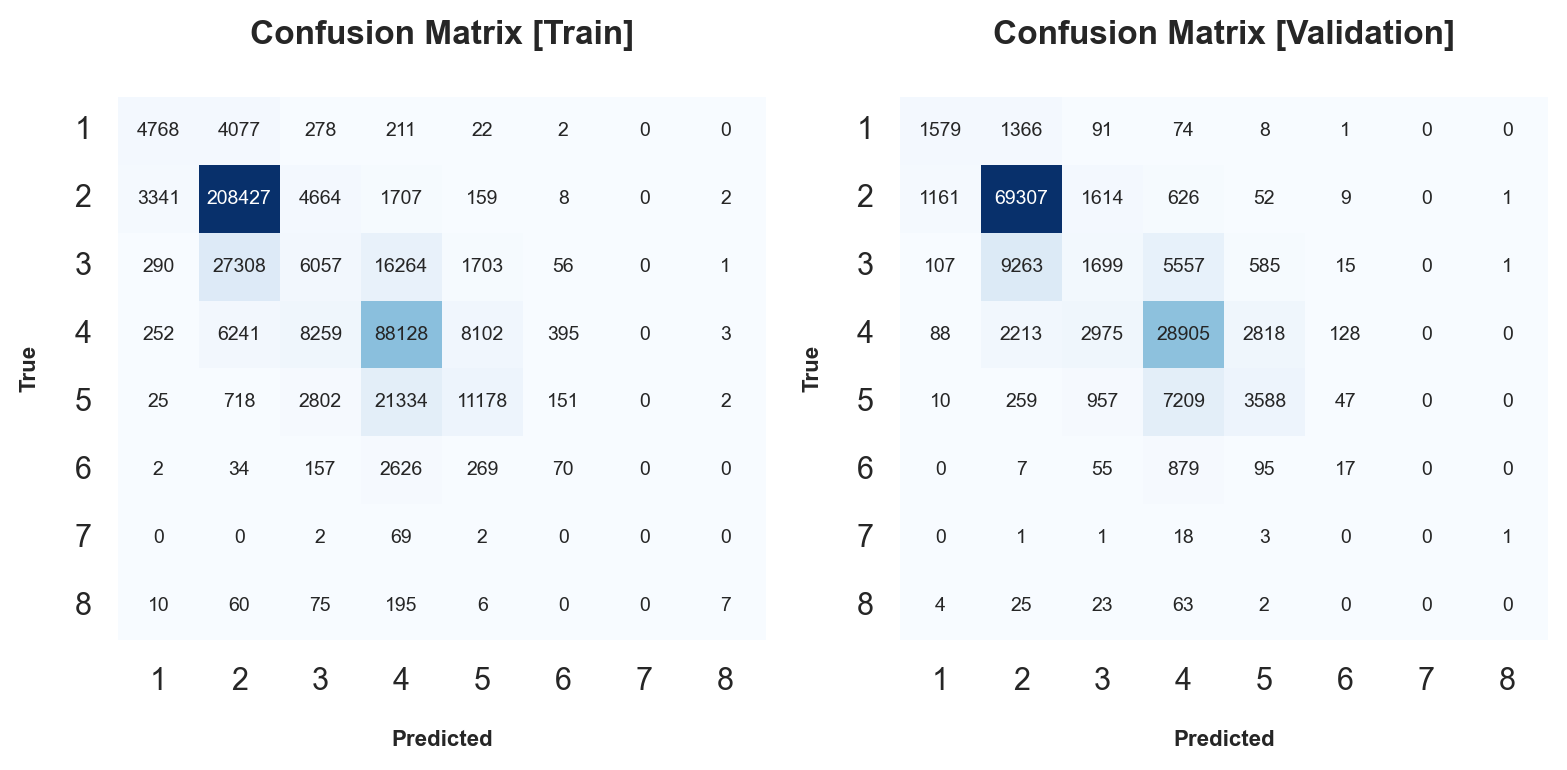

K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (With Standardization)

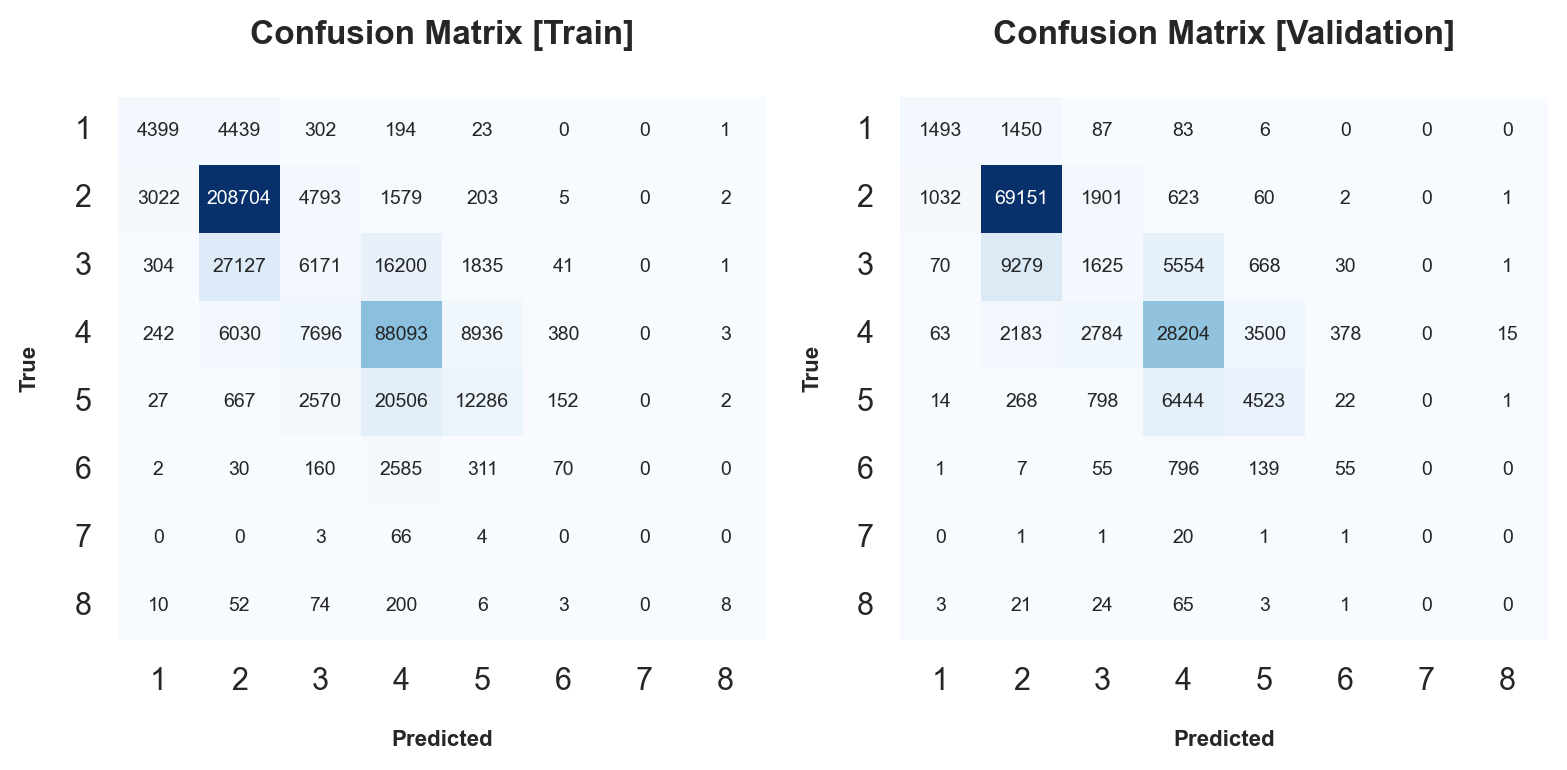

K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (With Normalization)

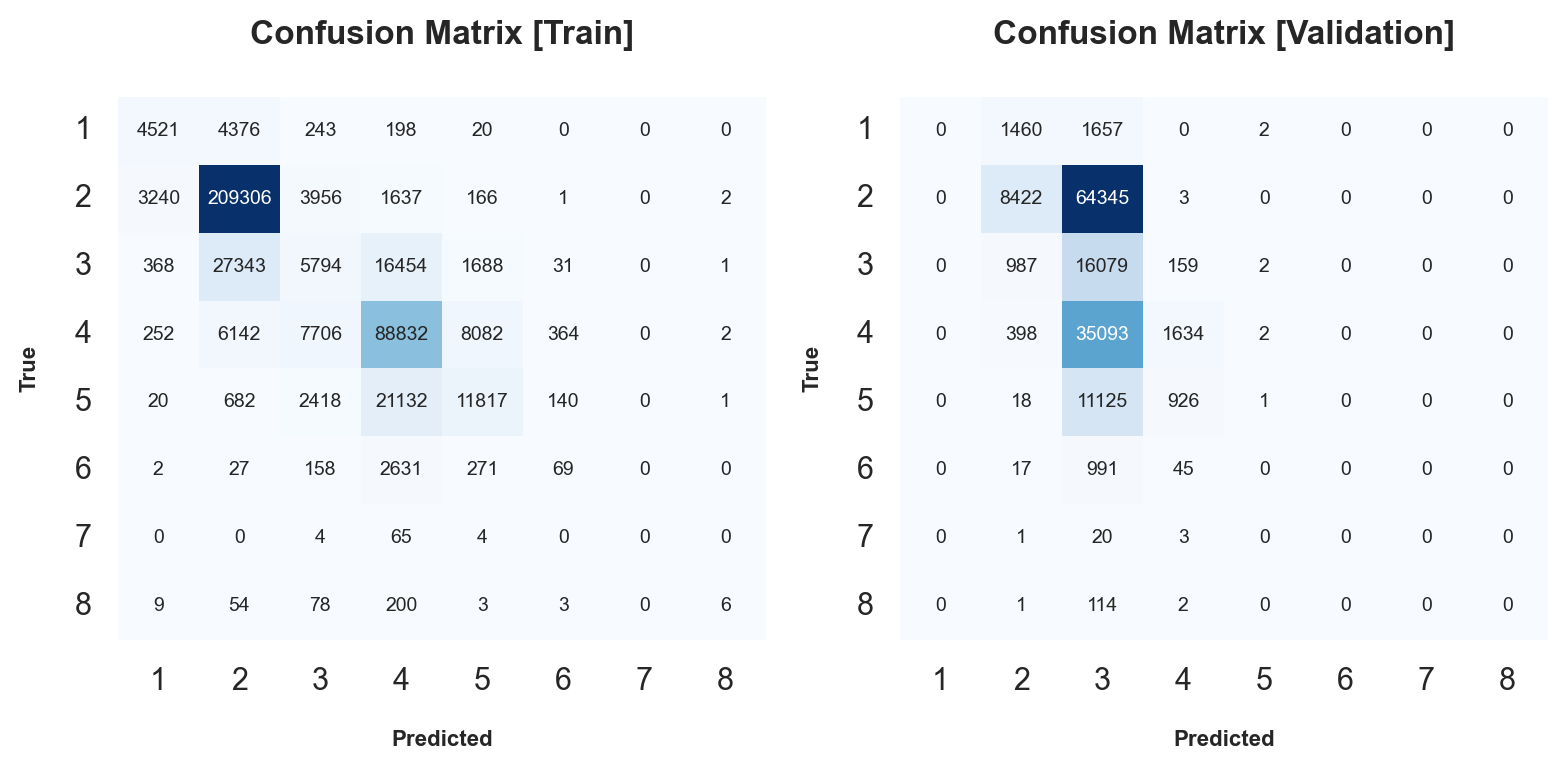

K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (With Log Transformation)

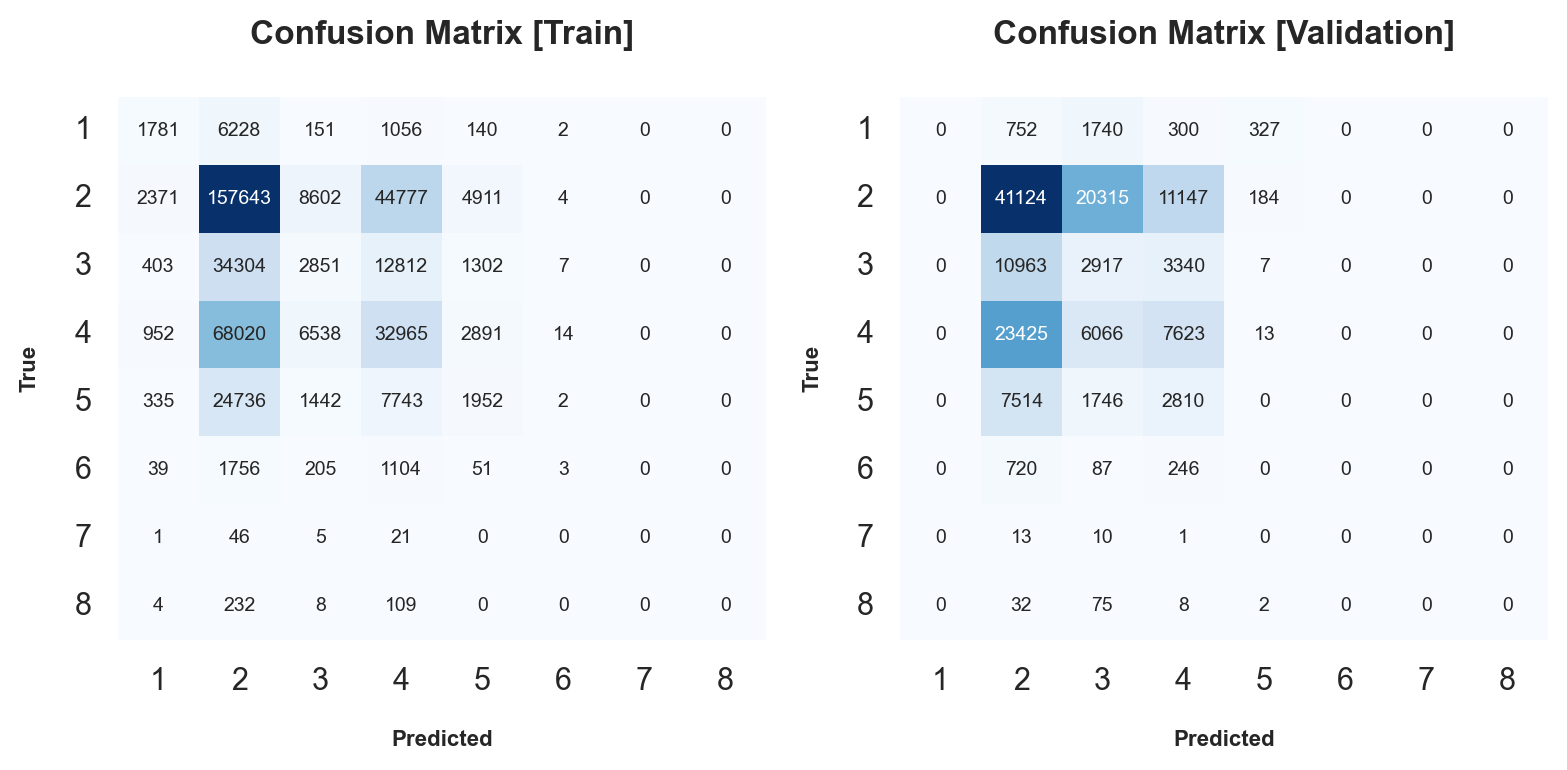

K-Nearest Neighbors [KD Tree Algorithm] | One-Hot Encoding

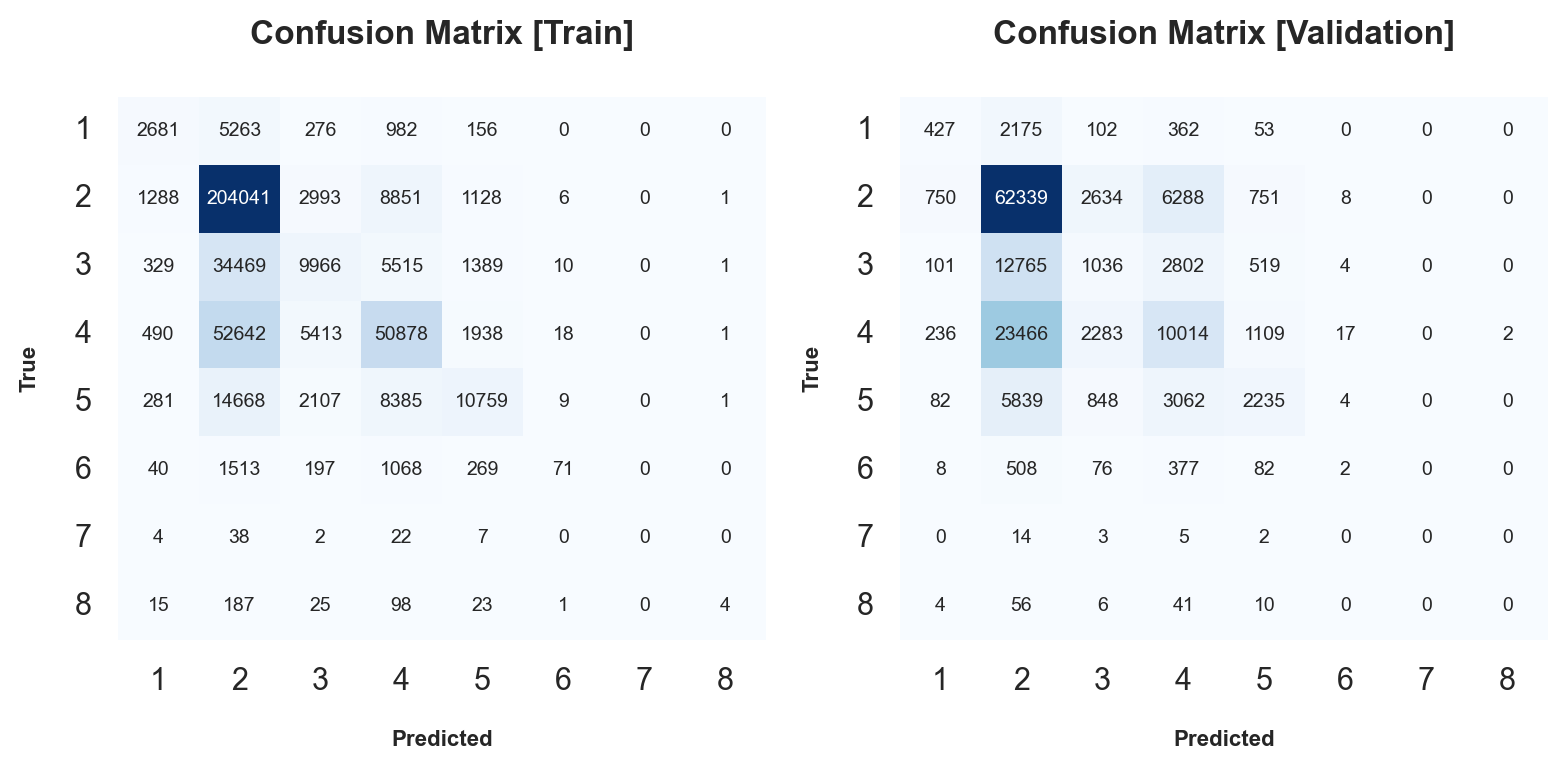

Results of the K-Nearest Neighbors [KD Tree Algorithm] Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC

In [27]:
# Classification Metrics & Confusion Matrix
classification_metrics('K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (Original Data)', knn_cv_ord_kd,
                       y_train, knn_ord_kd_pred_train, knn_ord_kd_pred_train_proba, 
                       y_val, knn_ord_kd_pred_val, knn_ord_kd_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (With Standardization)', knn_cv_ord_std_kd,
                        y_train, knn_ord_std_kd_pred_train, knn_ord_std_kd_pred_train_proba, 
                        y_val, knn_ord_std_kd_pred_val, knn_ord_std_kd_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (With Normalization)', knn_cv_ord_norm_kd,
                        y_train, knn_ord_norm_kd_pred_train, knn_ord_norm_kd_pred_train_proba, 
                        y_val, knn_ord_norm_kd_pred_val, knn_ord_norm_kd_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors [KD Tree Algorithm] | Ordinal Encoding (With Log Transformation)', knn_cv_ord_log_kd,
                        y_train, knn_ord_log_kd_pred_train, knn_ord_log_kd_pred_train_proba, 
                        y_val, knn_ord_log_kd_pred_val, knn_ord_log_kd_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors [KD Tree Algorithm] | One-Hot Encoding', knn_cv_ohe_kd,
                        y_train, knn_ohe_kd_pred_train, knn_ohe_kd_pred_train_proba, 
                        y_val, knn_ohe_kd_pred_val, knn_ohe_kd_pred_val_proba, classification_report=False)

# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train[20:], df_results_val[20:], 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the K-Nearest Neighbors [KD Tree Algorithm] Model')

#### **KNN - Ball Tree** <sup>[**[3.2]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-ball-tree'></a> 

In [28]:
# ------------------------------------------------- K-Nearest Neighbors [Ball Tree Algorithm] -------------------------------------------------
# ################################ Ordinal Encoding
# ============ Original Data
knn_ord_bt = KNeighborsClassifier(algorithm='ball_tree')
knn_cv_ord_bt = cross_validate(knn_ord_bt,X_train_ordinal_encoded,y_train,cv=5)

# Train the model
knn_ord_bt.fit(X_train_ordinal_encoded, y_train)

# Predictions
knn_ord_bt_pred_train = knn_ord_bt.predict(X_train_ordinal_encoded)
knn_ord_bt_pred_train_proba = knn_ord_bt.predict_proba(X_train_ordinal_encoded)

knn_ord_bt_pred_val = knn_ord_bt.predict(X_val_ordinal_encoded)
knn_ord_bt_pred_val_proba = knn_ord_bt.predict_proba(X_val_ordinal_encoded)

# ============ With Standardization
knn_ord_std_bt = KNeighborsClassifier(algorithm='ball_tree')
knn_cv_ord_std_bt = cross_validate(knn_ord_std_bt,X_train_standardized,y_train,cv=5)

# Train the model
knn_ord_std_bt.fit(X_train_standardized, y_train)

# Predictions
knn_ord_std_bt_pred_train = knn_ord_std_bt.predict(X_train_standardized)
knn_ord_std_bt_pred_train_proba = knn_ord_std_bt.predict_proba(X_train_standardized)

knn_ord_std_bt_pred_val = knn_ord_std_bt.predict(X_validation_standardized)
knn_ord_std_bt_pred_val_proba = knn_ord_std_bt.predict_proba(X_validation_standardized)

# ============ With Normalization
knn_ord_norm_bt = KNeighborsClassifier(algorithm='ball_tree')
knn_cv_ord_norm_bt = cross_validate(knn_ord_norm_bt,X_train_norm,y_train,cv=5)

# Train the model
knn_ord_norm_bt.fit(X_train_norm, y_train)

# Predictions
knn_ord_norm_bt_pred_train = knn_ord_norm_bt.predict(X_train_norm)
knn_ord_norm_bt_pred_train_proba = knn_ord_norm_bt.predict_proba(X_train_norm)

knn_ord_norm_bt_pred_val = knn_ord_norm_bt.predict(X_val_ordinal_encoded)
knn_ord_norm_bt_pred_val_proba = knn_ord_norm_bt.predict_proba(X_val_ordinal_encoded)

# ============ With Log Transformation
knn_ord_log_bt = KNeighborsClassifier(algorithm='ball_tree')
knn_cv_ord_log_bt = cross_validate(knn_ord_log_bt,X_train_log,y_train,cv=5)

# Train the model
knn_ord_log_bt.fit(X_train_log, y_train)

# Predictions
knn_ord_log_bt_pred_train = knn_ord_log_bt.predict(X_train_log)
knn_ord_log_bt_pred_train_proba = knn_ord_log_bt.predict_proba(X_train_log)

knn_ord_log_bt_pred_val = knn_ord_log_bt.predict(X_val_ordinal_encoded)
knn_ord_log_bt_pred_val_proba = knn_ord_log_bt.predict_proba(X_val_ordinal_encoded)

# ################################ One-Hot Encoding
knn_ohe_bt = KNeighborsClassifier(algorithm='ball_tree')
knn_cv_ohe_bt = cross_validate(knn_ohe_bt,X_train_ohe,y_train,cv=5)

# Train the model
knn_ohe_bt.fit(X_train_ohe, y_train)

# Predictions
knn_ohe_bt_pred_train = knn_ohe_bt.predict(X_train_ohe)
knn_ohe_bt_pred_train_proba = knn_ohe_bt.predict_proba(X_train_ohe)

knn_ohe_bt_pred_val = knn_ohe_bt.predict(X_val_ohe)
knn_ohe_bt_pred_val_proba = knn_ohe_bt.predict_proba(X_val_ohe)

## Time of Execution KNN (Ball Tree Algorithm) = Xh Xm Xs

K-Nearest Neighbors [Ball Tree Algorithm] | Ordinal Encoding (Original Data)

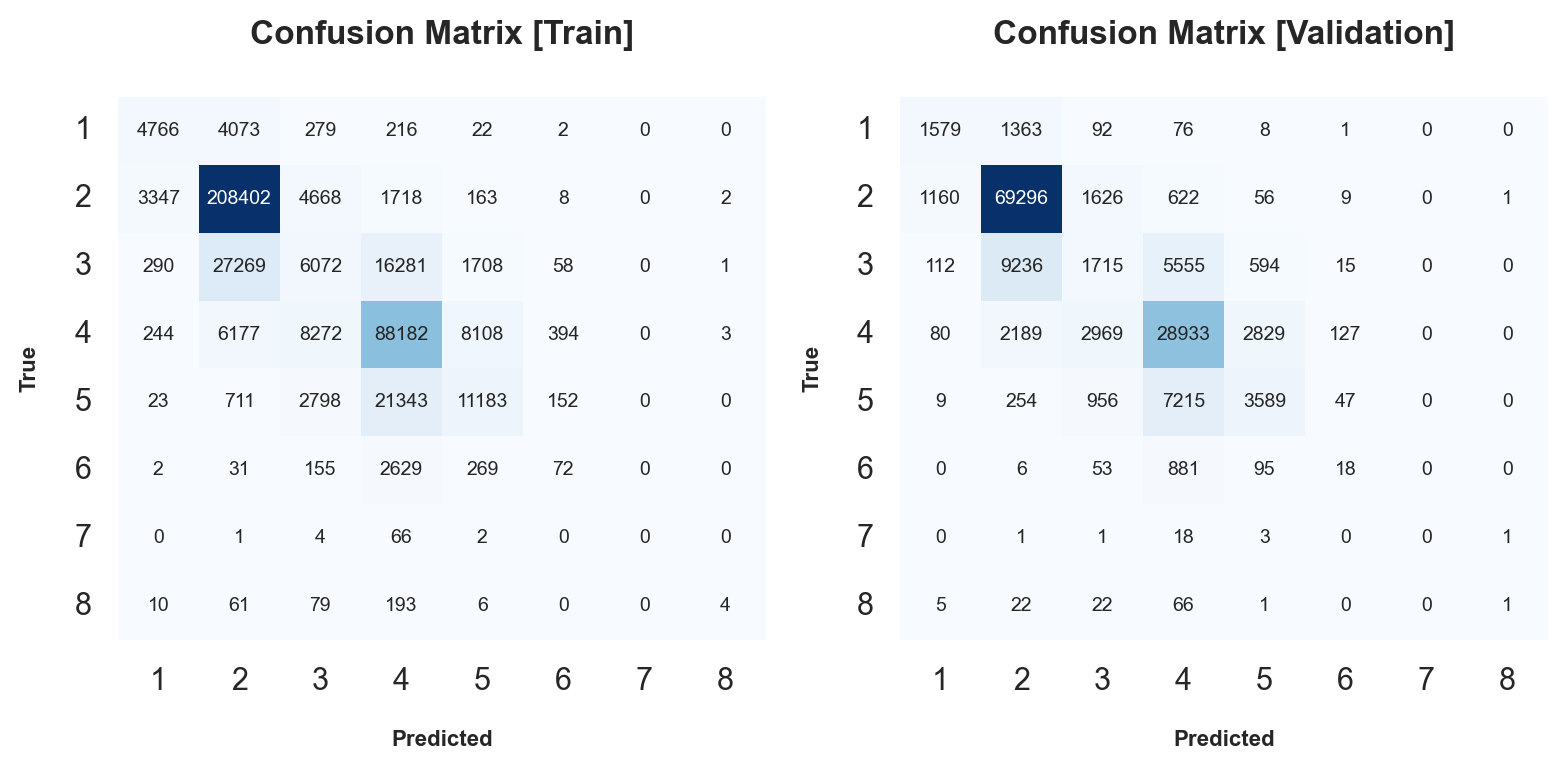

K-Nearest Neighbors [Ball Tree Algorithm] | Ordinal Encoding (With Standardization)

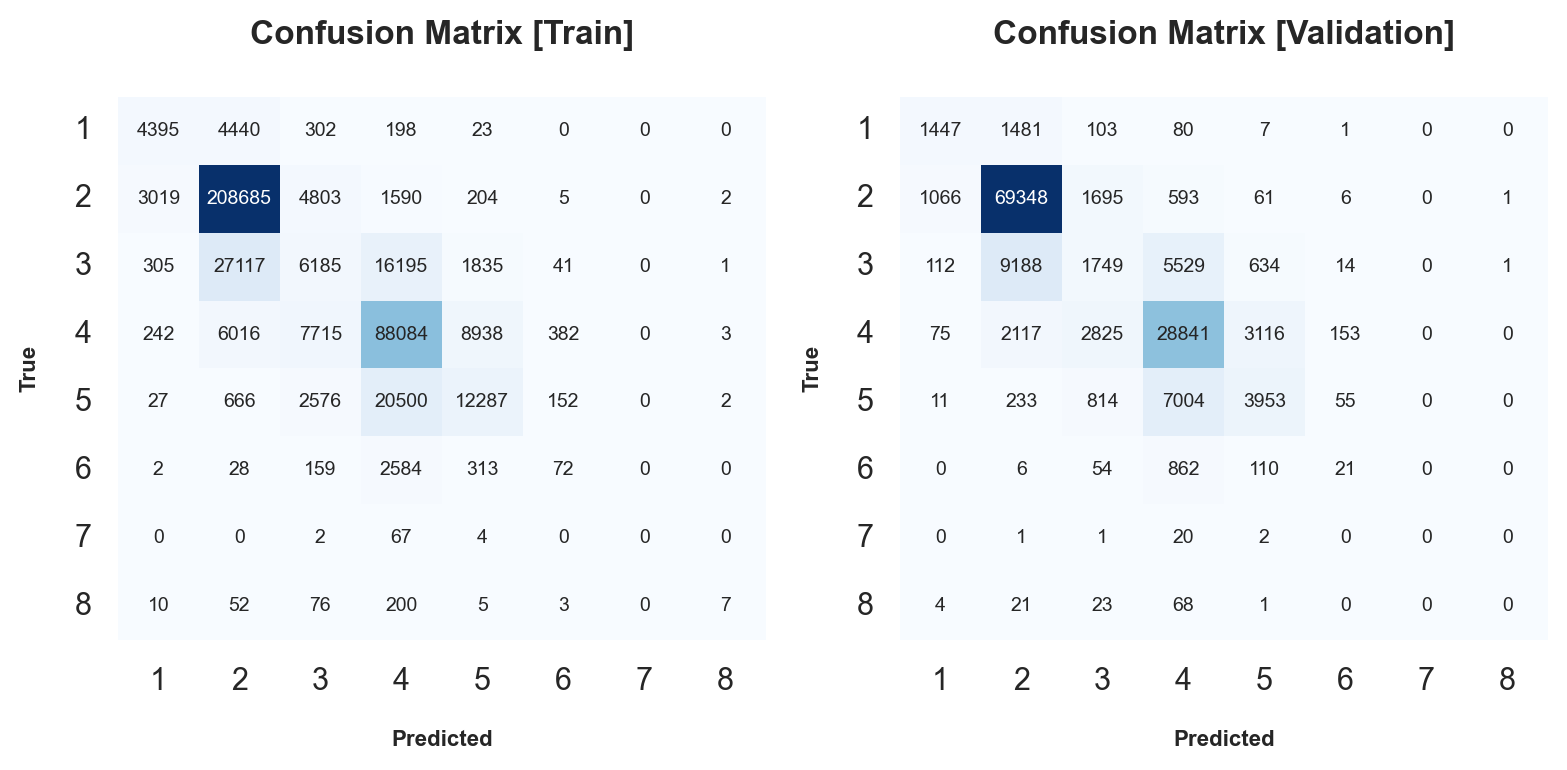

K-Nearest Neighbors [Ball Tree Algorithm] | Ordinal Encoding (With Normalization)

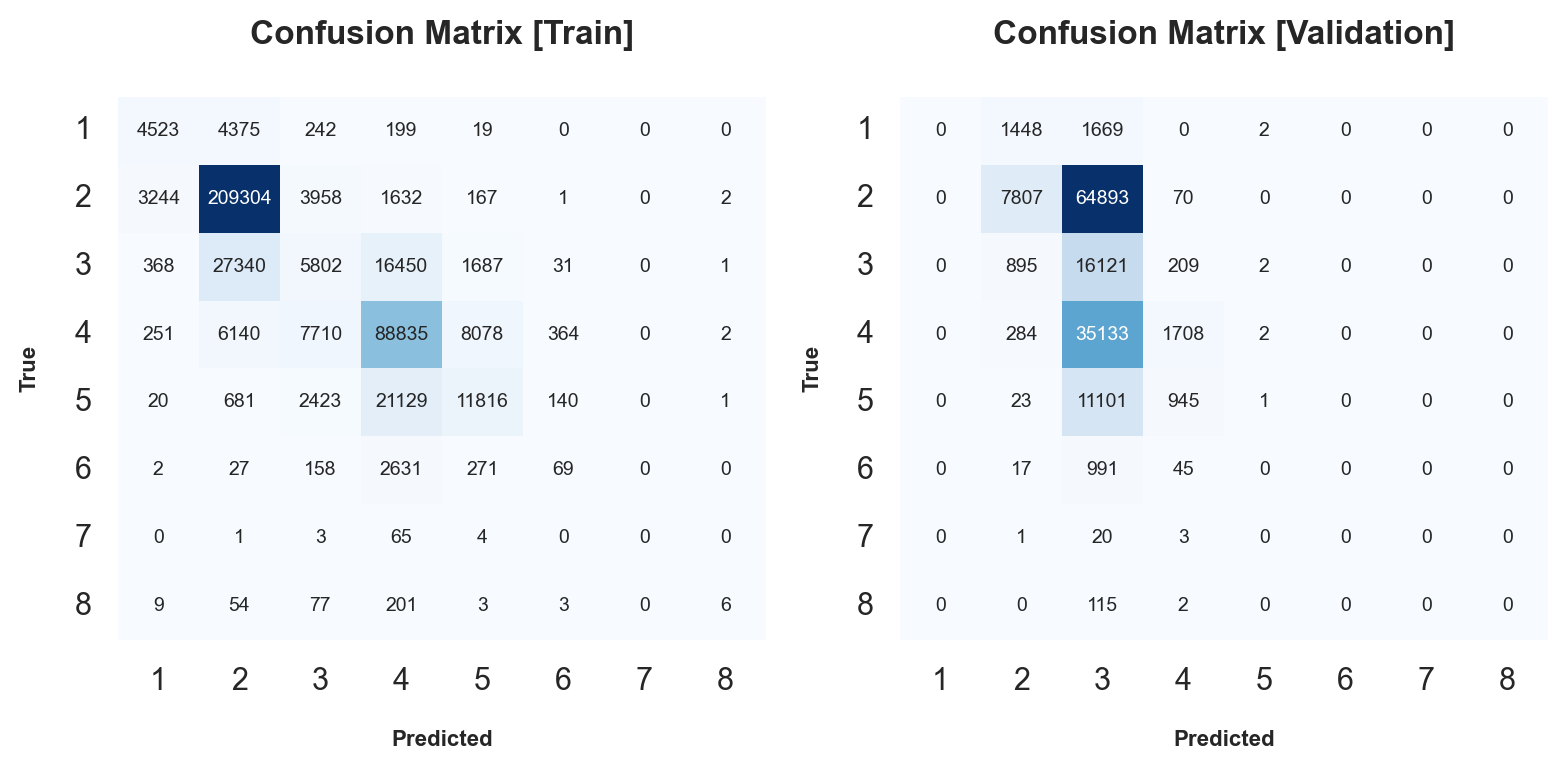

K-Nearest Neighbors [Ball Tree Algorithm] | Ordinal Encoding (With Log Transformation)

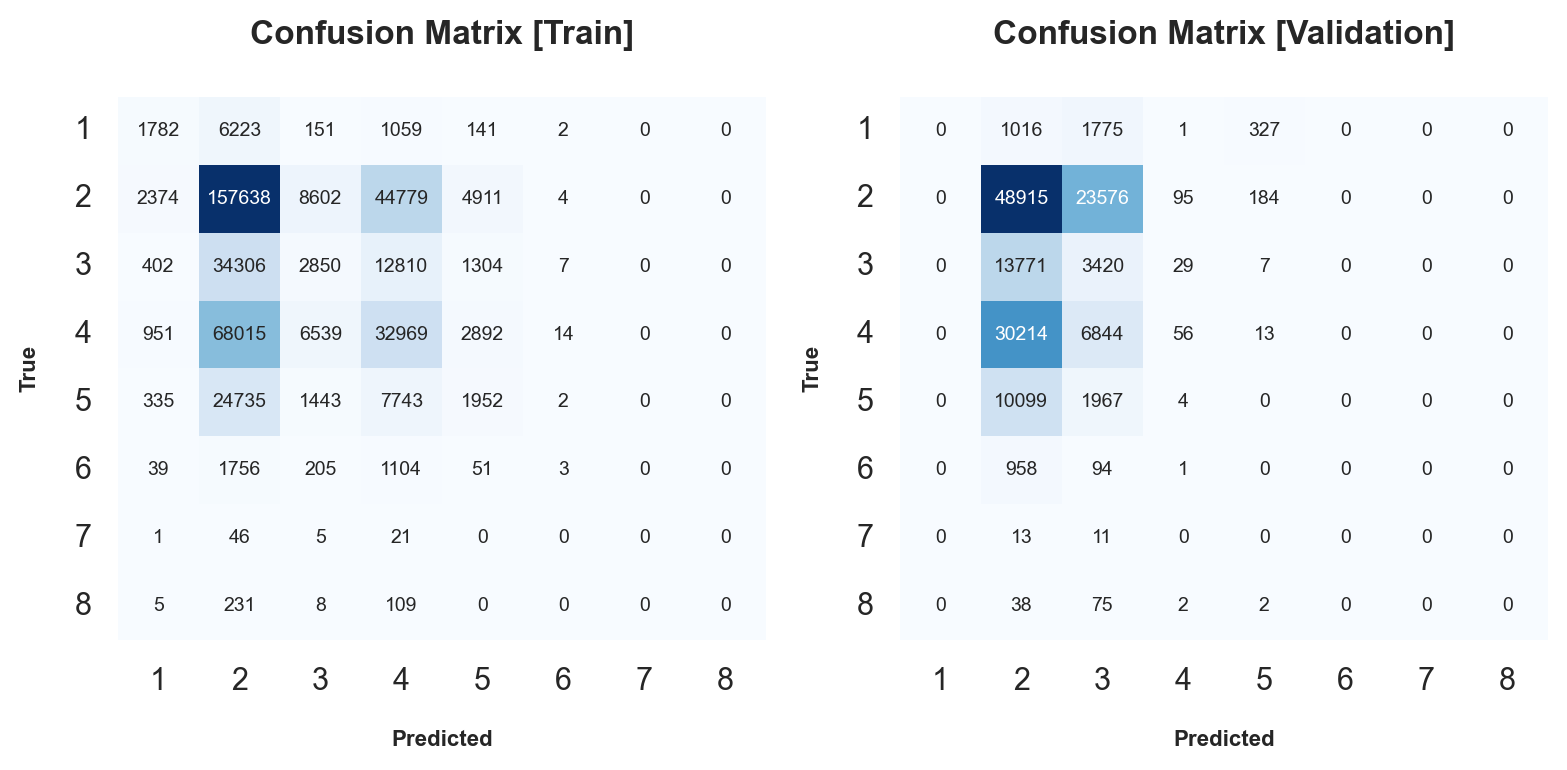

K-Nearest Neighbors [Ball Tree Algorithm] | One-Hot Encoding

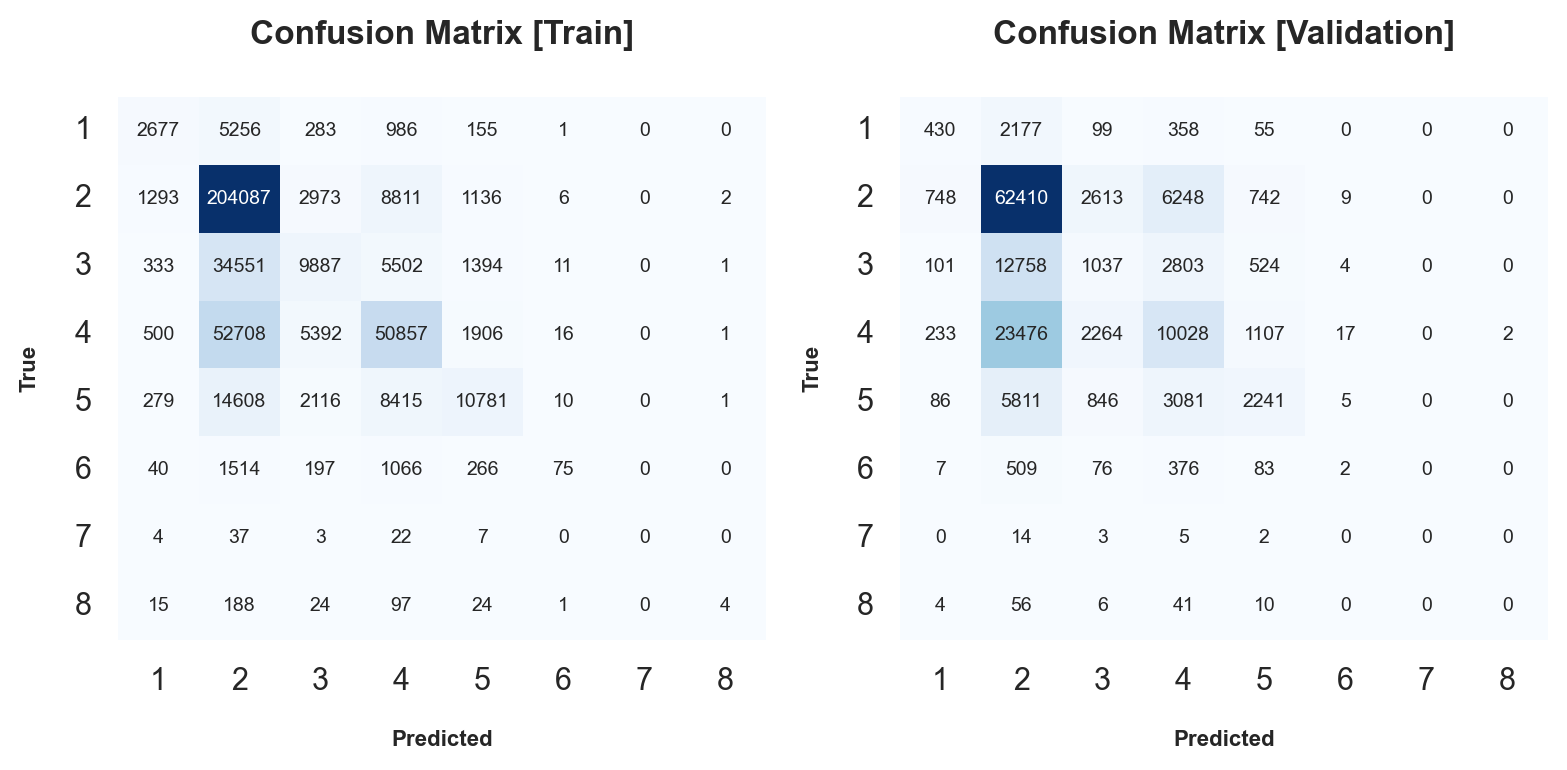

,Time of Execution (KFold),Accuracy,Precision,Recall,F1 Score,AUROC
Logistic Regression | Ordinal Encoding (Original Data),30.51 +/-0.47,0.74,0.54,0.25,0.23,0.88
Logistic Regression | Ordinal Encoding (With Standardization),20.18 +/-0.13,0.74,0.41,0.25,0.23,0.88
Logistic Regression | Ordinal Encoding (With Normalization),26.9 +/-0.36,0.74,0.54,0.25,0.23,0.88
Logistic Regression | Ordinal Encoding (With Log Transformation),25.45 +/-0.25,0.51,0.44,0.13,0.08,0.63
Logistic Regression | One-Hot Encoding,80.42 +/-0.51,0.51,0.46,0.13,0.08,0.66
Naïve Bayes [CategoricalNB] | Ordinal Encoding (Original Data),0.65 +/-0.0,0.73,0.43,0.34,0.32,0.9
Naïve Bayes [CategoricalNB] | One-Hot Encoding,6.52 +/-0.01,0.71,0.43,0.39,0.38,0.91
Naïve Bayes [GaussianNB] | Ordinal Encoding (Original Data),0.25 +/-0.0,0.6,0.31,0.32,0.23,0.88
Naïve Bayes [GaussianNB] | One-Hot Encoding,1.96 +/-0.01,0.63,0.33,0.53,0.33,0.9
K-Nearest Neighbors [Brute Force Algorithm] | Ordinal Encoding (Original Data),0.15 +/-0.0,0.74,0.49,0.34,0.35,0.76


In [32]:
# Classification Metrics & Confusion Matrix
classification_metrics('K-Nearest Neighbors [Ball Tree Algorithm] | Ordinal Encoding (Original Data)', knn_cv_ord_bt,
                       y_train, knn_ord_bt_pred_train, knn_ord_bt_pred_train_proba, 
                       y_val, knn_ord_bt_pred_val, knn_ord_bt_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors [Ball Tree Algorithm] | Ordinal Encoding (With Standardization)', knn_cv_ord_std_bt,
                        y_train, knn_ord_std_bt_pred_train, knn_ord_std_bt_pred_train_proba, 
                        y_val, knn_ord_std_bt_pred_val, knn_ord_std_bt_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors [Ball Tree Algorithm] | Ordinal Encoding (With Normalization)', knn_cv_ord_norm_bt,
                        y_train, knn_ord_norm_bt_pred_train, knn_ord_norm_bt_pred_train_proba, 
                        y_val, knn_ord_norm_bt_pred_val, knn_ord_norm_bt_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors [Ball Tree Algorithm] | Ordinal Encoding (With Log Transformation)', knn_cv_ord_log_bt,
                        y_train, knn_ord_log_bt_pred_train, knn_ord_log_bt_pred_train_proba, 
                        y_val, knn_ord_log_bt_pred_val, knn_ord_log_bt_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors [Ball Tree Algorithm] | One-Hot Encoding', knn_cv_ohe_bt,
                        y_train, knn_ohe_bt_pred_train, knn_ohe_bt_pred_train_proba, 
                        y_val, knn_ohe_bt_pred_val, knn_ohe_bt_pred_val_proba, classification_report=False)

# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train[:], df_results_val[:], 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the K-Nearest Neighbors [Ball Tree Algorithm] Model')

#### **KNN - Locally Weighted Learning (LWL)** <sup>[**[3.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html)</sup> <a class='anchor' id='knn-locally-weighted-learning'></a>

In [30]:
# ------------------------------------------------- K-Nearest Neighbors [LWL Algorithm] -------------------------------------------------
# ???

# I don't know how to implement the 'Locally Weighted Learning' algorithm in Python. 

---

> **Note:** Since we have not covered more algorithms in class yet, the notebook for the **Homework** was tested with the algorithms above. For the next phase, we intend to continue testing this classification problem with the remaining algorithms, such as the following, with the aim of improving the performance of the model on the benchmark **F1-Score (Macro)**.

### **Neural Network [<sup>[4]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html)** <a class='anchor' id='neural-network'></a>

---

### **Decision Tree[<sup>[5]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)** <a class='anchor' id='decision-tree'></a>

---

### **Random Forest[<sup>[6]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html)** <a class='anchor' id='random-forest'></a>

---

### **Support Vector Machine (SVM)[<sup>[7]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html)** <a class='anchor' id='svm'></a>

---

### **Gradient Boosting[<sup>[8]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)** <a class='anchor' id='gradient-boosting'></a>

---

### <a class='anchor' id='3_1'></a> **🧪 Model Selection**

In [31]:
# Save the results in a Excel file
df_results_train.index.name = 'Model'
df_results_val.index.name = 'Model'

df_results_train.to_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/Models_Results_30.10.2024.xlsx',          ################# Change the day
                          sheet_name='Train_AndreSilvestre')                                                    ################# Change the name of the sheet
df_results_val.to_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/Models_Results_30.10.2024.xlsx',            ################# Change the day
                        sheet_name='Validation_AndreSilvestre')                                                ################# Change the name of the sheet

OSError: Cannot save file into a non-existent directory: '[ML]_Project_EDAOutputs_Group33/Modeling'

---

### <a class='anchor' id='3_2'></a> **📏 Model Evaluation**

In [ ]:
# [To be continued...]

---

### <a class='anchor' id='3_3'></a> **📈 Model Optimization**

---

### 📊 **Feature Importance**

---

## 🔮 **Test Data Prediction**

In [ ]:
# # Best Model
# best_model = XXXXXXXXXXXX

# # Predictions on the test_data
# pred_test_ord = best_model.predict(test_data_ordinal_encoded)
# pred_test_ohe = best_model.predict(test_data_ohe)

In [ ]:
# # Dictionary with the mapping of the predicted values
# claim_injury_type_dict_swapped = {1: "1. CANCELLED", 2: "2. NON-COMP", 3: "3. MED ONLY", 4: "4. TEMPORARY",
#                                   5: "5. PPD SCH LOSS", 6: "6. PPD NSL", 7: "7. PTD", 8: "8. DEATH"}

# # Create a DataFrame with the 'ID' and the 'Predicted' columns
# submission_data = pd.DataFrame({'Claim Identifier': test_data['Claim Identifier'], 'Claim Injury Type': pred_test_ohe})
# submission_data['Claim Injury Type'] = submission_data['Claim Injury Type'].map(claim_injury_type_dict_swapped)
# submission_data

---

## 📋 **CSV Export - Submission**

In [ ]:
# # Each submission in Kaggle should have different names and should have the version name in the following format 
# # – GroupXX_VersionXX.csv (for example, Group 1 submitted his 8th version, the file should be named Group01__Version08.csv)

# submission_data.to_csv('submissions/Group33_Version01.csv', index=False, header=True, sep=',')
# # submission_data.to_csv('submissions/Group33_Version02.csv', index=False, header=True, sep=',')

---